# Italian work risk

This project aims to analyse the current condition of occupation in Italy, with a particular atention to the risk of injury and mortality. We observe the variation of the ocupation related with different laws? and the mortality per region? 

## source of data

The two (three?) primary sources of our data are: 

- ISTAT Open Data
- INAIL Open Data
- Robe di Akomantoso???

### ISTAT data

data coming from ISTAT datasets are:
- occupation
- regular and not regular occupation (per year)
- not regular occupation (per field of occupation)

### INAIL data
data coming from INAIL datasets are:

- semester data per region about injuries.

# 1 Dati INAIL

In [397]:
import os
import zipfile
import pandas as pd

# Define the folder containing the zip files
folder_path = 'dati-inail'

# Initialize a list to hold the DataFrames
dataframes = []

# Iterate over each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.zip'):
        # Construct the full file path
        file_path = os.path.join(folder_path, file_name)
        
        # Open the zip file
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            # Get the list of files in the zip archive
            zip_contents = zip_ref.namelist()
            
            # Assume there is only one CSV file per zip archive
            csv_file_name = zip_contents[0]
            
            # Extract the CSV file to a file-like object
            with zip_ref.open(csv_file_name) as csv_file:
                try:
                    # Attempt to read the CSV file using UTF-8 encoding
                    df = pd.read_csv(csv_file, encoding='utf-8', sep=';')
                except UnicodeDecodeError:
                    # If UTF-8 fails, try reading with ISO-8859-1 encoding
                    csv_file.seek(0)  # Reset file pointer to the beginning
                    df = pd.read_csv(csv_file, encoding='ISO-8859-1', sep=';')
                
                # Add the DataFrame to the list
                dataframes.append(df)



C:\Users\danie\AppData\Local\Temp\ipykernel_7976\3597711007.py:29: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, encoding='utf-8', sep=';')


In [398]:
# List of region names
regions = ['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'EmiliaRomagna', 'FriuliVeneziaGiulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 'Sicilia', 'Toscana', 'TrentinoAltoAdige', 'Umbria', 'Valledaosta', 'Veneto']

# Create the dictionary associating each DataFrame with a region name
regions_dfs = dict(zip(regions, dataframes))

# # Print the keys and the first few rows of the DataFrames for verification
# for region, df in dataframes_dict.items():
#     print(f"Region: {region}")
#     print(df.head())
#     print()

Proviamo a sciogliere tutte ste merda di sigle:
- LuogoAccadimento: da Provincia.csv colonna Provincia (considera che in questo file ha sempre tre cifre) => sostituire con DescrProvincia
- IdentificativoInfortunato: rimane così: anonmimato
- LuogoNascita: da LuogoNascita.csv colonna LuogoNascita => sostitutire con DescrNazioneNascita
- SettoreAttivitaEconomica : da SettoreAttivitaEconomica colonna SettoreAttivitaEconomica => sostituire con DescrAteco

In [399]:
# Define the folder containing the files
folder_path = 'dati-inail'

# Initialize a dictionary to hold the DataFrames
util_dict = {}

# Iterate over each file in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    # Check if the file is a CSV file
    if file_name.endswith('.csv'):
        try:
            # Attempt to read the CSV file using UTF-8 encoding
            df = pd.read_csv(file_path, encoding='utf-8', sep=';')
        except UnicodeDecodeError:
            # If UTF-8 fails, try reading with ISO-8859-1 encoding
            df = pd.read_csv(file_path, encoding='ISO-8859-1', sep=';')
        
        # Use the CSV file name without extension as the key
        key_name = os.path.splitext(file_name)[0]
        util_dict[key_name] = df

In [400]:
util_dict['Provincia']

,Provincia,CodSiglaProvincia,DescrProvincia,CodCittaMetropolitana,CodRegione,DescrRegione,CodMacroregione,DescrMacroregione,CodNazione,DescrNazione,DataInizioValidita,DataFineValidita
0,-1,-1,Non Determinato,-1,-1,Non Determinato,-1,Non Determinato,-1,Non determinato,18/03/1861,31/12/9999
1,1,TO,Torino,201,1,Piemonte,1,Nord - Ovest,IT,Italia,18/03/1861,31/12/9999
2,2,VC,Vercelli,0,1,Piemonte,1,Nord - Ovest,IT,Italia,12/01/1927,31/12/9999
3,3,NO,Novara,0,1,Piemonte,1,Nord - Ovest,IT,Italia,18/03/1861,31/12/9999
4,4,CN,Cuneo,0,1,Piemonte,1,Nord - Ovest,IT,Italia,18/03/1861,31/12/9999
...,...,...,...,...,...,...,...,...,...,...,...,...
110,110,BT,Barletta-Andria-Trani,0,16,Puglia,4,Sud,IT,Italia,27/07/2009,31/12/9999
111,111,SU,Sud Sardegna,0,20,Sardegna,5,Isole,IT,Italia,01/01/2017,31/12/9999
112,701,FU,Fiume,0,6,Friuli Venezia Giulia,2,Nord - Est,IT,Italia,27/01/1924,10/02/1947
113,702,PL,Pola,0,6,Friuli Venezia Giulia,2,Nord - Est,IT,Italia,27/01/1924,10/02/1947


In [401]:
# Get the Provincia DataFrame from util_dict
to_add = [util_dict['Provincia'], util_dict['LuogoNascita'], util_dict['SettoreAttivitaEconomica'], util_dict['DecisioneIstruttoriaEsitoMortale']]

# Initialize a dictionary to hold the merged DataFrames
merged_dfs = {}

# Iterate over each DataFrame in regions_dfs
for region, df in regions_dfs.items():
    # Create a copy of the DataFrame
    df_copy = df.copy()

    #add Provincia    
    # Merge with provincia_df on the specified columns
    merged_df = pd.merge(df_copy, to_add[0], left_on='LuogoAccadimento', right_on='Provincia', how='left')
    # Add only the DescrProvincia column to the original DataFrame copy
    df_copy['DescrProvincia'] = merged_df['DescrProvincia']

    #add LuogoNascita    
    # Merge with provincia_df on the specified columns
    merged_df = pd.merge(df_copy, to_add[1], left_on='LuogoNascita', right_on='LuogoNascita', how='left')
    # Add only the DescrProvincia column to the original DataFrame copy
    df_copy['DescrNazioneNascita'] = merged_df['DescrNazioneNascita']

    #add SettoreAttivitaEconomica    
    # Merge with provincia_df on the specified columns
    merged_df = pd.merge(df_copy, to_add[2], left_on='SettoreAttivitaEconomica', right_on='SettoreAttivitaEconomica', how='left')
    # Add only the DescrProvincia column to the original DataFrame copy
    df_copy['DescrAtecoLiv1'] = merged_df['DescrAtecoLiv1']

    #add SettoreAttivitaEconomica    
    # Merge with provincia_df on the specified columns
    merged_df = pd.merge(df_copy, to_add[3], left_on='DecisioneIstruttoriaEsitoMortale', right_on='DecisioneIstruttoriaEsitoMortale', how='left')
    # Add only the DescrProvincia column to the original DataFrame copy
    df_copy['DescrDecisioneIstruttoriaEsitoMortale'] = merged_df['DescrDecisioneIstruttoriaEsitoMortale']


    
    # Store the modified DataFrame in the merged_dfs dictionary
    merged_dfs[region] = df_copy


In [402]:
# Define the required columns
required_columns = [
    'DataRilevazione', 'DataProtocollo', 'DataAccadimento', 'DataDefinizione',
    'DataMorte', 'LuogoAccadimento', 'DescrProvincia', 'IdentificativoInfortunato', 'Genere',
    'Eta', 'LuogoNascita', 'DescrNazioneNascita', 'IdentificativoCaso', 'DecisioneIstruttoriaEsitoMortale', 'DescrDecisioneIstruttoriaEsitoMortale',
    'GradoMenomazione', 'IdentificativoDatoreLavoro', 'SettoreAttivitaEconomica', 'DescrAtecoLiv1'
]

# Initialize a dictionary to hold the filtered DataFrames
filtered_dfs = {}

# Select only the required columns for each DataFrame in merged_dfs
for region, df in merged_dfs.items():
    filtered_df = df[required_columns]
    filtered_dfs[region] = filtered_df

    



In [403]:
# Add the 'Regione' column for each DataFrame in filtered_dfs using .loc
for region, df in filtered_dfs.items():
    df.loc[:, 'Regione'] = region

C:\Users\danie\AppData\Local\Temp\ipykernel_7976\1972613886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Regione'] = region
C:\Users\danie\AppData\Local\Temp\ipykernel_7976\1972613886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Regione'] = region
C:\Users\danie\AppData\Local\Temp\ipykernel_7976\1972613886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [404]:
filtered_dfs['Abruzzo']

,DataRilevazione,DataProtocollo,DataAccadimento,DataDefinizione,DataMorte,LuogoAccadimento,DescrProvincia,IdentificativoInfortunato,Genere,Eta,LuogoNascita,DescrNazioneNascita,IdentificativoCaso,DecisioneIstruttoriaEsitoMortale,DescrDecisioneIstruttoriaEsitoMortale,GradoMenomazione,IdentificativoDatoreLavoro,SettoreAttivitaEconomica,DescrAtecoLiv1,Regione
0,31/10/2023,20/09/2019,18/09/2019,09/03/2020,NaN,67,Teramo,553058,M,50,ITAL,ITALIA,22509749,ND,Non Applicabile,-1,3556168,C 22,Attivita' manifatturiere,Abruzzo
1,31/10/2023,07/07/2020,03/07/2020,28/07/2020,NaN,68,Pescara,17888326,M,57,ITAL,ITALIA,23029158,ND,Non Applicabile,-1,544459,F 43,Costruzioni,Abruzzo
2,31/10/2023,02/03/2022,19/02/2022,25/03/2022,NaN,67,Teramo,3902254,M,59,ITAL,ITALIA,24151604,ND,Non Applicabile,-1,7446105,G 47,"Commercio all'ingrosso e al dettaglio, riparaz...",Abruzzo
3,31/10/2023,24/05/2022,23/05/2022,15/06/2022,NaN,66,L'Aquila,3749374,M,48,ITAL,ITALIA,24301015,ND,Non Applicabile,-1,2673133,F 41,Costruzioni,Abruzzo
4,31/10/2023,31/12/2021,30/12/2021,20/01/2022,NaN,69,Chieti,8540763,M,26,ITAL,ITALIA,23949261,ND,Non Applicabile,-1,4173909,Q 86,Sanita' e assistenza sociale,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65830,31/10/2023,05/02/2020,04/02/2020,13/03/2020,NaN,69,Chieti,340481,M,47,ITAL,ITALIA,22824554,ND,Non Applicabile,13,3216578,C 20,Attivita' manifatturiere,Abruzzo
65831,31/10/2023,04/03/2019,23/02/2019,21/03/2019,NaN,66,L'Aquila,14494955,M,45,ITAL,ITALIA,22126488,ND,Non Applicabile,-1,-1,ND,Non determinato,Abruzzo
65832,31/10/2023,06/06/2018,04/06/2018,12/07/2018,NaN,69,Chieti,7558726,M,42,ITAL,ITALIA,21604368,ND,Non Applicabile,9,3936990,C 17,Attivita' manifatturiere,Abruzzo
65833,31/10/2023,10/05/2021,06/05/2021,10/05/2021,NaN,67,Teramo,33162630,M,17,ITAL,ITALIA,23605125,ND,Non Applicabile,-1,-1,ND,Non determinato,Abruzzo


In [405]:
date_columns = ['DataRilevazione', 'DataProtocollo', 'DataAccadimento', 'DataDefinizione', 'DataMorte']
date_format = '%d/%m/%Y'

for df_name, df in filtered_dfs.items():
    for col in date_columns:
        df[col] = pd.to_datetime(df[col], format=date_format).dt.strftime('%Y-%m-%d')

C:\Users\danie\AppData\Local\Temp\ipykernel_7976\2946744860.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col], format=date_format).dt.strftime('%Y-%m-%d')
C:\Users\danie\AppData\Local\Temp\ipykernel_7976\2946744860.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col], format=date_format).dt.strftime('%Y-%m-%d')
C:\Users\danie\AppData\Local\Temp\ipykernel_7976\2946744860.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [406]:
# Concatenate all DataFrames in filtered_dfs into one DataFrame
concatenated_df = pd.concat(filtered_dfs.values(), ignore_index=True)

In [407]:
# Move 'Regione' column to the first position
cols = concatenated_df.columns.tolist()
cols = ['Regione'] + [col for col in cols if col != 'Regione']
concatenated_df = concatenated_df[cols]

In [408]:

# Define the mapping for MacroRegione
macroregione_mapping = {
    'Valledaosta': 'NordOvest',
    'Piemonte': 'NordOvest',
    'Liguria': 'NordOvest',
    'Lombardia': 'NordOvest',
    'Veneto': 'NordEst',
    'TrentinoAltoAdige': 'NordEst',
    'FriuliVeneziaGiulia': 'NordEst',
    'EmiliaRomagna': 'NordEst',
    'Toscana': 'Centro',
    'Lazio': 'Centro',
    'Umbria': 'Centro',
    'Marche': 'Centro',
    'Puglia': 'Sud',
    'Campania': 'Sud',
    'Calabria': 'Sud',
    'Basilicata': 'Sud',
    'Abruzzo': 'Sud',
    'Molise': 'Sud',
    'Sicilia': 'Sud'
}

# Add the MacroRegione column to concatenated_df
concatenated_df['MacroRegione'] = concatenated_df['Regione'].map(macroregione_mapping)

# Reorder columns to have 'Regione' and 'MacroRegione' at the beginning
final_columns = ['Regione', 'MacroRegione'] + [col for col in required_columns if col != 'Regione']
concatenated_df = concatenated_df[final_columns]

In [409]:
concatenated_df

,Regione,MacroRegione,DataRilevazione,DataProtocollo,DataAccadimento,DataDefinizione,DataMorte,LuogoAccadimento,DescrProvincia,IdentificativoInfortunato,...,Eta,LuogoNascita,DescrNazioneNascita,IdentificativoCaso,DecisioneIstruttoriaEsitoMortale,DescrDecisioneIstruttoriaEsitoMortale,GradoMenomazione,IdentificativoDatoreLavoro,SettoreAttivitaEconomica,DescrAtecoLiv1
0,Abruzzo,Sud,2023-10-31,2019-09-20,2019-09-18,2020-03-09,NaN,67,Teramo,553058,...,50,ITAL,ITALIA,22509749,ND,Non Applicabile,-1,3556168,C 22,Attivita' manifatturiere
1,Abruzzo,Sud,2023-10-31,2020-07-07,2020-07-03,2020-07-28,NaN,68,Pescara,17888326,...,57,ITAL,ITALIA,23029158,ND,Non Applicabile,-1,544459,F 43,Costruzioni
2,Abruzzo,Sud,2023-10-31,2022-03-02,2022-02-19,2022-03-25,NaN,67,Teramo,3902254,...,59,ITAL,ITALIA,24151604,ND,Non Applicabile,-1,7446105,G 47,"Commercio all'ingrosso e al dettaglio, riparaz..."
3,Abruzzo,Sud,2023-10-31,2022-05-24,2022-05-23,2022-06-15,NaN,66,L'Aquila,3749374,...,48,ITAL,ITALIA,24301015,ND,Non Applicabile,-1,2673133,F 41,Costruzioni
4,Abruzzo,Sud,2023-10-31,2021-12-31,2021-12-30,2022-01-20,NaN,69,Chieti,8540763,...,26,ITAL,ITALIA,23949261,ND,Non Applicabile,-1,4173909,Q 86,Sanita' e assistenza sociale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3065938,Veneto,NordEst,2023-10-31,2018-05-18,2018-05-15,2018-06-07,NaN,23,Verona,7548099,...,27,Z100,ALBANIA,21555041,ND,Non Applicabile,-1,4454317,G 47,"Commercio all'ingrosso e al dettaglio, riparaz..."
3065939,Veneto,NordEst,2023-10-31,2021-05-10,2021-05-06,2021-05-10,NaN,26,Treviso,33162720,...,29,ITAL,ITALIA,23598166,ND,Non Applicabile,-1,-1,ND,Non determinato
3065940,Veneto,NordEst,2023-10-31,2020-05-05,2020-05-04,2020-05-05,NaN,27,Venezia,32910525,...,27,ITAL,ITALIA,22962023,ND,Non Applicabile,-1,-1,ND,Non determinato
3065941,Veneto,NordEst,2023-10-31,2021-05-10,2021-05-05,2021-06-16,NaN,27,Venezia,33162639,...,13,Z140,MOLDAVIA,23619740,ND,Non Applicabile,-1,-1,ND,Non determinato


## 1. Numero incidenti

In [410]:
# Convert DataAccadimento to datetime type if it's not already
concatenated_df['DataAccadimento'] = pd.to_datetime(concatenated_df['DataAccadimento'], errors='coerce')

# Verify conversion
print(concatenated_df['DataAccadimento'])

# Extract year from 'DataAccadimento' column
concatenated_df['Year'] = concatenated_df['DataAccadimento'].dt.year

# Group by 'MacroRegione' and 'Year', and count occurrences
injury_per_year_region = concatenated_df.groupby(['MacroRegione', 'Year']).size().reset_index(name='Count')

# Calculate total values summing all MacroRegione
total_values = injury_per_year_region.groupby('Year').sum().reset_index()
total_values['MacroRegione'] = 'Total'

# Append the total values row to the injury_per_year_region DataFrame
injury_per_year_region = pd.concat([injury_per_year_region, total_values], ignore_index=True)


0         2019-09-18
1         2020-07-03
2         2022-02-19
3         2022-05-23
4         2021-12-30
             ...    
3065938   2018-05-15
3065939   2021-05-06
3065940   2020-05-04
3065941   2021-05-05
3065942   2022-07-08
Name: DataAccadimento, Length: 3065943, dtype: datetime64[ns]


In [411]:
injury_per_year_region

,MacroRegione,Year,Count
0,Centro,2018,123343
1,Centro,2019,124570
2,Centro,2020,102492
3,Centro,2021,106831
4,Centro,2022,137175
5,NordEst,2018,204940
6,NordEst,2019,204304
7,NordEst,2020,177548
8,NordEst,2021,183124
9,NordEst,2022,206535


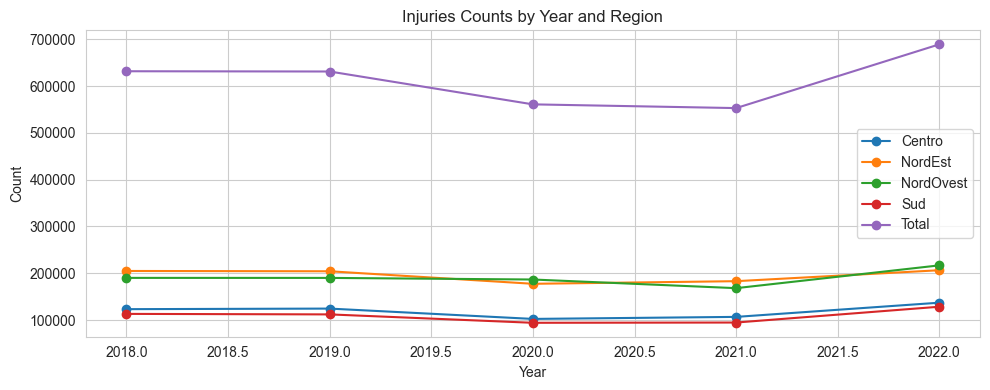

In [412]:
import matplotlib.pyplot as plt

# Extract unique regions for plotting
regions = injury_per_year_region['MacroRegione'].unique()

# Plotting
plt.figure(figsize=(10, 4))

# Plot each region's data
for region in regions:
    region_data = injury_per_year_region[injury_per_year_region['MacroRegione'] == region]
    plt.plot(region_data['Year'], region_data['Count'], marker='o', label=region)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Injuries Counts by Year and Region')
plt.legend()

# Display plot
plt.grid(True)
plt.tight_layout()
plt.show()

## 2. Numero morti

In [413]:
deaths = concatenated_df[concatenated_df['DataMorte'].notnull()]

In [414]:
deaths

,Regione,MacroRegione,DataRilevazione,DataProtocollo,DataAccadimento,DataDefinizione,DataMorte,LuogoAccadimento,DescrProvincia,IdentificativoInfortunato,...,LuogoNascita,DescrNazioneNascita,IdentificativoCaso,DecisioneIstruttoriaEsitoMortale,DescrDecisioneIstruttoriaEsitoMortale,GradoMenomazione,IdentificativoDatoreLavoro,SettoreAttivitaEconomica,DescrAtecoLiv1,Year
339,Abruzzo,Sud,2023-10-31,2021-06-21,2021-06-18,2021-11-19,2021-06-18,66,L'Aquila,5960865,...,ITAL,ITALIA,23638609,015,Esiti Mortali Nei Termini Con Superstiti,-1,8245033,F 42,Costruzioni,2021
391,Abruzzo,Sud,2023-10-31,2021-07-13,2021-07-12,2023-01-18,2021-07-12,69,Chieti,9409360,...,ITAL,ITALIA,23687107,017,Morte Con Superstiti Itinere,-1,4173909,Q 86,Sanita' e assistenza sociale,2021
974,Abruzzo,Sud,2023-10-31,2022-06-07,2022-03-17,2022-10-31,2022-10-02,68,Pescara,17949838,...,ITAL,ITALIA,24387687,024,Persona non tutelata,-1,-1,ND,Non determinato,2022
1636,Abruzzo,Sud,2023-10-31,2018-10-15,2018-08-22,2022-02-28,2018-08-22,66,L'Aquila,4299208,...,ITAL,ITALIA,21840591,015,Esiti Mortali Nei Termini Con Superstiti,-1,7157326,C 23,Attivita' manifatturiere,2018
1776,Abruzzo,Sud,2023-10-31,2020-11-13,2020-11-11,2020-12-04,2020-11-11,69,Chieti,19463380,...,ITAL,ITALIA,23243188,015,Esiti Mortali Nei Termini Con Superstiti,-1,7000574,G 47,"Commercio all'ingrosso e al dettaglio, riparaz...",2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063492,Veneto,NordEst,2023-10-31,2020-04-10,2020-03-29,2020-04-15,2020-03-29,25,Belluno,32898079,...,ITAL,ITALIA,22904406,021,Difetto Occasione di lavoro,-1,4658153,L 68,Attivita' immobiliari,2020
3063531,Veneto,NordEst,2023-10-31,2020-05-08,2020-03-10,2020-06-09,2020-04-03,27,Venezia,32900612,...,ITAL,ITALIA,22969798,015,Esiti Mortali Nei Termini Con Superstiti,-1,5826271,H 53,Trasporto e magazzinaggio,2020
3064536,Veneto,NordEst,2023-10-31,2020-05-04,2020-03-23,2020-09-10,2020-04-21,27,Venezia,32910144,...,ITAL,ITALIA,22969663,021,Difetto Occasione di lavoro,-1,3344959,O 84,"Amministrazione pubblica e difesa, assicurazio...",2020
3065214,Veneto,NordEst,2023-10-31,2020-01-08,2019-12-23,2023-02-28,2019-12-23,23,Verona,27964027,...,ITAL,ITALIA,22770058,015,Esiti Mortali Nei Termini Con Superstiti,-1,-1,ND,Non determinato,2019


In [415]:
# Extract year from 'DataAccadimento' column
deaths['Year'] = deaths['DataAccadimento'].dt.year

# Group by 'MacroRegione' and 'Year', and count occurrences
deaths_year_per_region = deaths.groupby(['MacroRegione', 'Year']).size().reset_index(name='Count')

# Calculate total values summing all MacroRegione
total_values = deaths_year_per_region.groupby('Year').sum().reset_index()
total_values['MacroRegione'] = 'Total'

# Append the total values row to the deaths_year_per_region DataFrame
deaths_year_per_region = pd.concat([deaths_year_per_region, total_values], ignore_index=True)


C:\Users\danie\AppData\Local\Temp\ipykernel_7976\1269326665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths['Year'] = deaths['DataAccadimento'].dt.year


In [416]:
deaths_year_per_region

,MacroRegione,Year,Count
0,Centro,2018,241
1,Centro,2019,245
2,Centro,2020,305
3,Centro,2021,272
4,Centro,2022,263
5,NordEst,2018,295
6,NordEst,2019,279
7,NordEst,2020,310
8,NordEst,2021,312
9,NordEst,2022,283


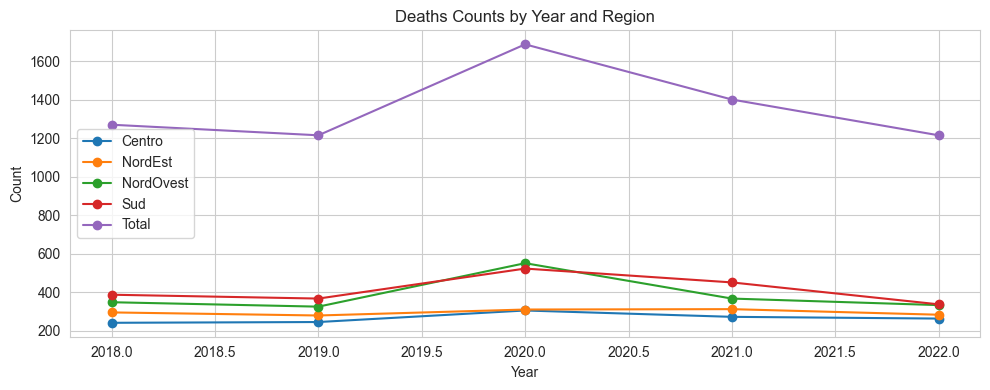

In [417]:
# Extract unique regions for plotting
regions = deaths_year_per_region['MacroRegione'].unique()

# Plotting
plt.figure(figsize=(10, 4))

# Plot each region's data
for region in regions:
    region_data = deaths_year_per_region[deaths_year_per_region['MacroRegione'] == region]
    plt.plot(region_data['Year'], region_data['Count'], marker='o', label=region)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Deaths Counts by Year and Region')
plt.legend()

# Display plot
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Età per anno

### 3.1 Incidenti per età

In [418]:
# Extract year from 'DataAccadimento' column
concatenated_df['Year'] = concatenated_df['DataAccadimento'].dt.year

# Define a function to categorize age into groups
def categorize_age(age):
    if age <= 15:
        return '0-15'
    elif 16 <= age <= 64:
        return '16-64'
    else:
        return '65+'

# Apply the function to create a new 'AgeGroup' column
concatenated_df['AgeGroup'] = concatenated_df['Eta'].apply(categorize_age)

# Group by 'MacroRegione', 'Year', and 'AgeGroup', and count the number of events
injury_per_year_region_age = concatenated_df.groupby(['MacroRegione', 'Year', 'AgeGroup']).size().reset_index(name='Count')

# Calculate total values summing all MacroRegione for each year and age group
total_values = injury_per_year_region_age.groupby(['Year', 'AgeGroup']).sum().reset_index()
total_values['MacroRegione'] = 'Total'

# Append the total values row to the injury_per_year_region_age DataFrame
injury_per_year_region_age = pd.concat([injury_per_year_region_age, total_values], ignore_index=True)

In [419]:
# Display the result
injury_per_year_region_age

,MacroRegione,Year,AgeGroup,Count
0,Centro,2018,0-15,9823
1,Centro,2018,16-64,110517
2,Centro,2018,65+,3003
3,Centro,2019,0-15,10455
4,Centro,2019,16-64,110922
...,...,...,...,...
70,Total,2021,16-64,506466
71,Total,2021,65+,11837
72,Total,2022,0-15,49397
73,Total,2022,16-64,625183


c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


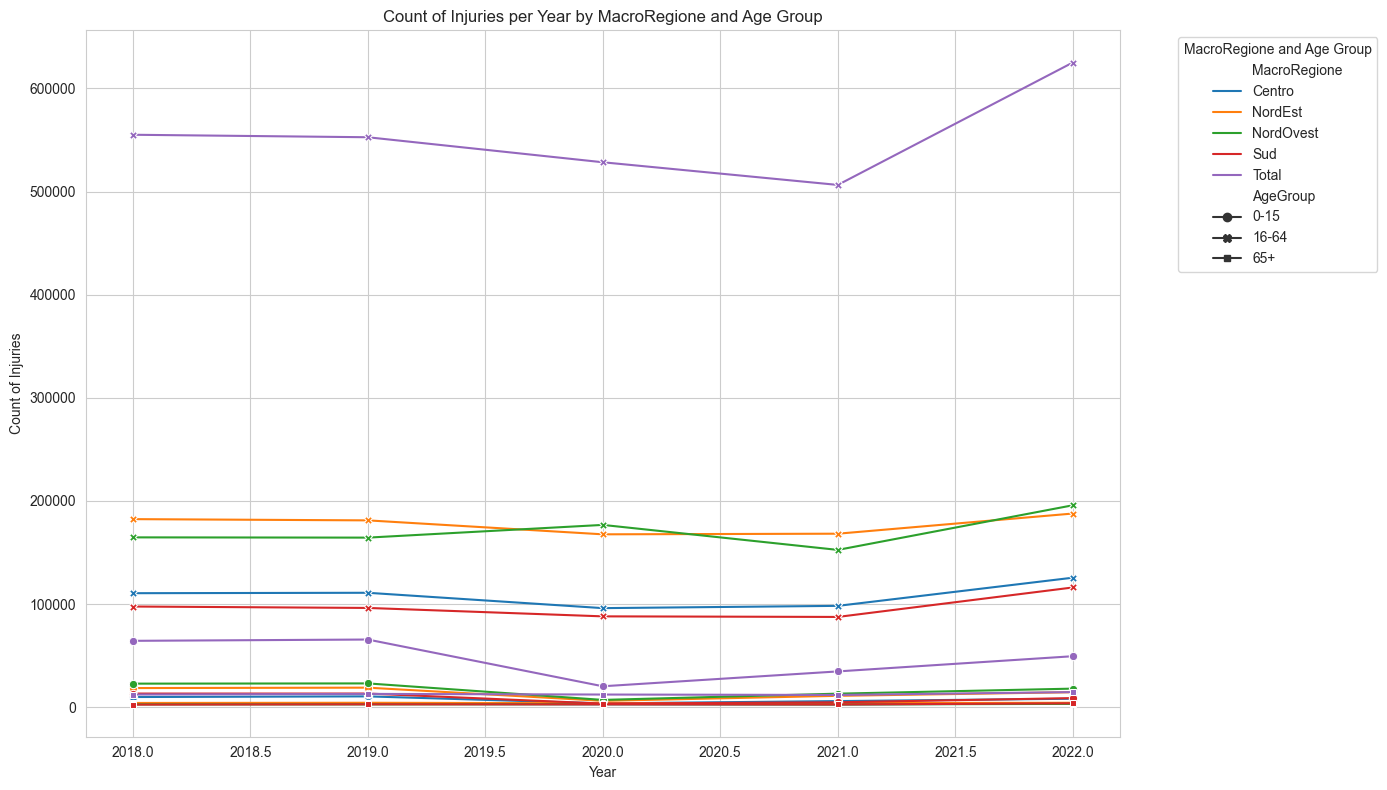

In [420]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(14, 8))

# Use seaborn to create a line plot
sns.lineplot(data=injury_per_year_region_age, x='Year', y='Count', hue='MacroRegione', style='AgeGroup', markers=True, dashes=False)

# Adding title and labels
plt.title('Count of Injuries per Year by MacroRegione and Age Group')
plt.xlabel('Year')
plt.ylabel('Count of Injuries')
plt.legend(title='MacroRegione and Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [421]:
# Sum the values per year and age group
total_injuries_per_year_agegroup = injury_per_year_region_age.groupby(['Year', 'AgeGroup'])['Count'].sum().reset_index()


In [422]:
total_injuries_per_year_agegroup

,Year,AgeGroup,Count
0,2018,0-15,128646
1,2018,16-64,1110252
2,2018,65+,24506
3,2019,0-15,131158
4,2019,16-64,1105420
5,2019,65+,25716
6,2020,0-15,40502
7,2020,16-64,1056908
8,2020,65+,24464
9,2021,0-15,69320


c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


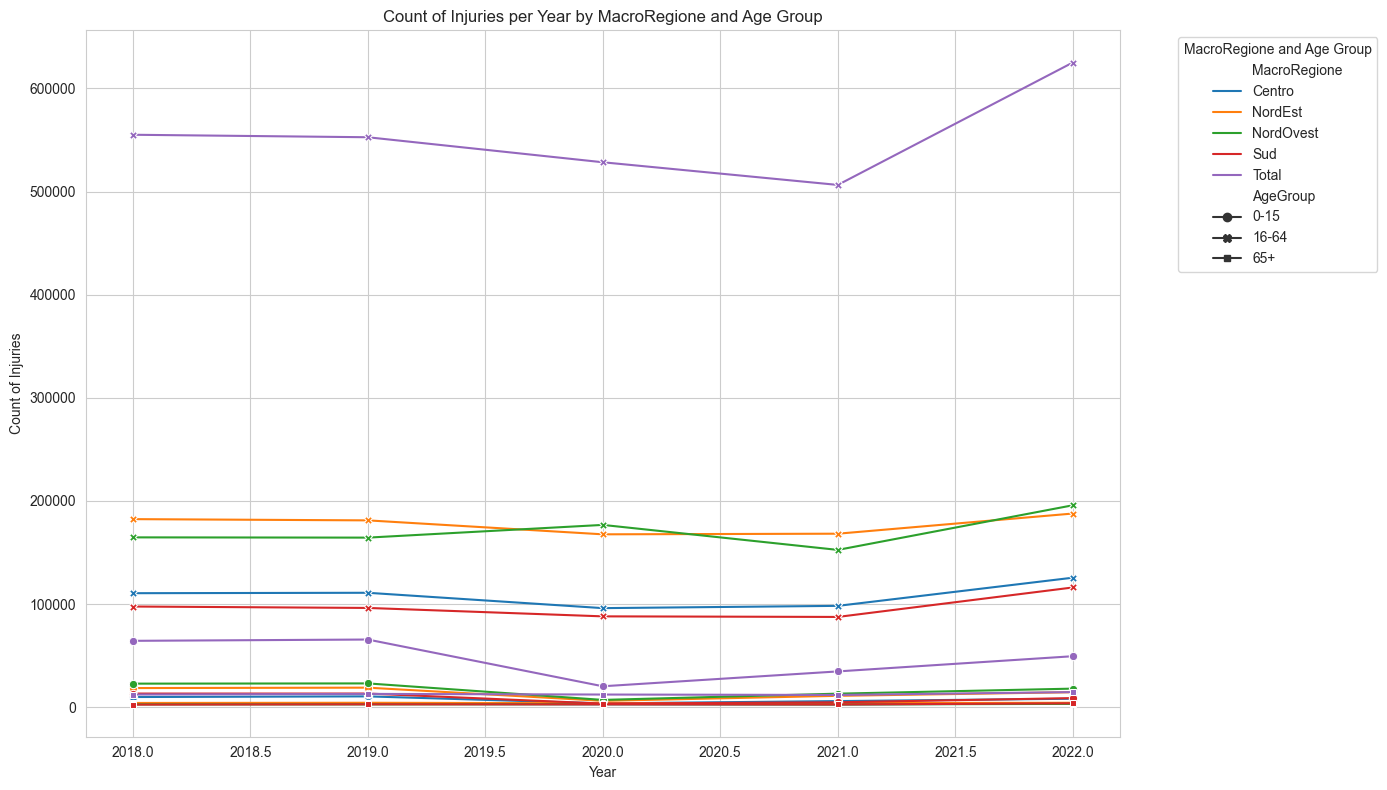

In [423]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(14, 8))

# Use seaborn to create a line plot
sns.lineplot(data=injury_per_year_region_age, x='Year', y='Count', hue='MacroRegione', style='AgeGroup', markers=True, dashes=False)

# Adding title and labels
plt.title('Count of Injuries per Year by MacroRegione and Age Group')
plt.xlabel('Year')
plt.ylabel('Count of Injuries')
plt.legend(title='MacroRegione and Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

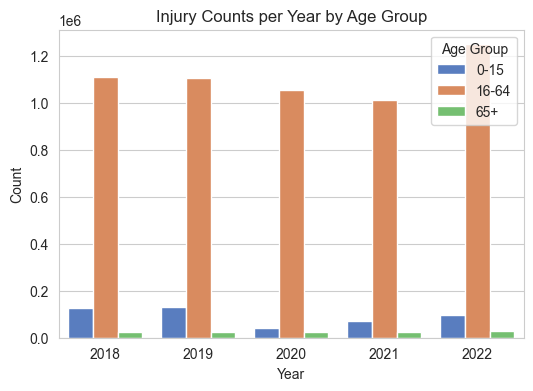

In [424]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x='Year', y='Count', hue='AgeGroup', data=total_injuries_per_year_agegroup, palette='muted')
plt.title('Injury Counts per Year by Age Group')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()

### 2.2. Morti per età

In [425]:
import pandas as pd

# Extract year from 'DataAccadimento' column
deaths['Year'] = pd.to_datetime(deaths['DataAccadimento']).dt.year

# Define a function to categorize age into groups
def categorize_age(age):
    if age <= 15:
        return '0-15'
    elif 16 <= age <= 64:
        return '16-64'
    else:
        return '65+'

# Apply the function to create a new 'AgeGroup' column
deaths['AgeGroup'] = deaths['Eta'].apply(categorize_age)

# Group by 'MacroRegione', 'Year', and 'AgeGroup', and count the number of events
deaths_per_year_region_age = deaths.groupby(['MacroRegione', 'Year', 'AgeGroup']).size().reset_index(name='Count')



C:\Users\danie\AppData\Local\Temp\ipykernel_7976\1973372981.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths['Year'] = pd.to_datetime(deaths['DataAccadimento']).dt.year
C:\Users\danie\AppData\Local\Temp\ipykernel_7976\1973372981.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths['AgeGroup'] = deaths['Eta'].apply(categorize_age)


In [426]:
deaths_per_year_region_age

,MacroRegione,Year,AgeGroup,Count
0,Centro,2018,16-64,222
1,Centro,2018,65+,19
2,Centro,2019,0-15,1
3,Centro,2019,16-64,225
4,Centro,2019,65+,19
5,Centro,2020,16-64,275
6,Centro,2020,65+,30
7,Centro,2021,16-64,245
8,Centro,2021,65+,27
9,Centro,2022,0-15,1


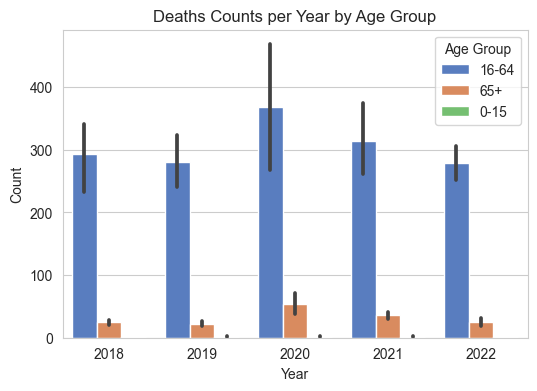

In [427]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x='Year', y='Count', hue='AgeGroup', data=deaths_per_year_region_age, palette='muted')
plt.title('Deaths Counts per Year by Age Group')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()

## 3 Mortalità

In [428]:
import pandas as pd

# Assuming concatenated_df is already defined and contains the relevant data

# Convert date columns to datetime if they are not already
concatenated_df['DataAccadimento'] = pd.to_datetime(concatenated_df['DataAccadimento'], errors='coerce')
concatenated_df['DataMorte'] = pd.to_datetime(concatenated_df['DataMorte'], errors='coerce')

# Extract year from date columns
concatenated_df['YearAccadimento'] = concatenated_df['DataAccadimento'].dt.year
concatenated_df['YearMorte'] = concatenated_df['DataMorte'].dt.year

# Calculate total number of DataAccadimento and DataMorte for each MacroRegione in each year
data_accadimento_count = concatenated_df.groupby(['MacroRegione', 'YearAccadimento']).size().reset_index(name='TotalDataAccadimento')
data_morte_count = concatenated_df.groupby(['MacroRegione', 'YearMorte']).size().reset_index(name='TotalDataMorte')

# Merge the counts on MacroRegione and year
merged_counts = pd.merge(data_accadimento_count, data_morte_count, left_on=['MacroRegione', 'YearAccadimento'], right_on=['MacroRegione', 'YearMorte'], how='left')

# Fill NaN values in TotalDataMorte with 0
merged_counts['TotalDataMorte'] = merged_counts['TotalDataMorte'].fillna(0).astype(int)

# Calculate the ratio of DataMorte to DataAccadimento as a percentage
merged_counts['MorteAccadimentoRatio'] = (merged_counts['TotalDataMorte'] / merged_counts['TotalDataAccadimento']) * 100

# Rename columns for clarity
merged_counts.rename(columns={'YearAccadimento': 'Year'}, inplace=True)

# Drop the redundant 'YearMorte' column
merged_counts.drop(columns=['YearMorte'], inplace=True)

# Calculate total values summing all MacroRegione
total_values = merged_counts.groupby('Year').sum().reset_index()
total_values['MacroRegione'] = 'Total'

# Recalculate the MorteAccadimentoRatio for the total values
total_values['MorteAccadimentoRatio'] = (total_values['TotalDataMorte'] / total_values['TotalDataAccadimento']) * 100

# Append the total values row to the merged_counts DataFrame
merged_counts = pd.concat([merged_counts, total_values], ignore_index=True)


In [429]:
# Print the final DataFrame for verification
merged_counts

,MacroRegione,Year,TotalDataAccadimento,TotalDataMorte,MorteAccadimentoRatio
0,Centro,2018,123343,232,0.188093
1,Centro,2019,124570,241,0.193466
2,Centro,2020,102492,292,0.284900
3,Centro,2021,106831,285,0.266776
4,Centro,2022,137175,270,0.196829
5,NordEst,2018,204940,292,0.142481
6,NordEst,2019,204304,277,0.135582
7,NordEst,2020,177548,292,0.164463
8,NordEst,2021,183124,329,0.179660
9,NordEst,2022,206535,284,0.137507


c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-p

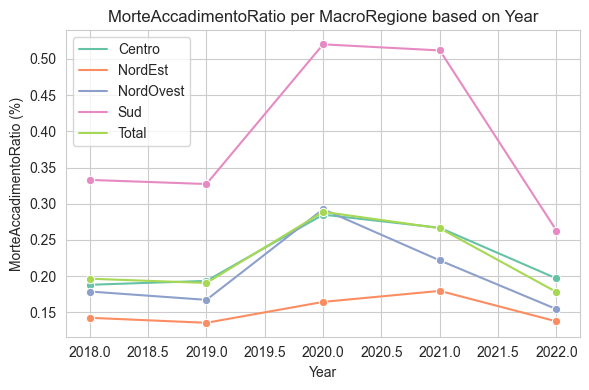

In [430]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_counts DataFrame is already defined and contains the relevant data

# Set up the plot
plt.figure(figsize=(6, 4))
sns.set_style('whitegrid')

# Plot MorteAccadimentoRatio per MacroRegione based on Year
sns.lineplot(x='Year', y='MorteAccadimentoRatio', hue='MacroRegione', data=merged_counts, marker='o', palette='Set2')

# Set plot title and labels
plt.title('MorteAccadimentoRatio per MacroRegione based on Year')
plt.xlabel('Year')
plt.ylabel('MorteAccadimentoRatio (%)')

# Display the plot
plt.legend(loc='best')
plt.tight_layout()
plt.show()


## Mashi vs Femmine

In [431]:
import pandas as pd

# Assuming concatenated_df is already defined and contains the relevant data

# Convert DataAccadimento to datetime type if it's not already
concatenated_df['DataAccadimento'] = pd.to_datetime(concatenated_df['DataAccadimento'], errors='coerce')

# Extract year from 'DataAccadimento' column
concatenated_df['Year'] = concatenated_df['DataAccadimento'].dt.year

# Group by 'MacroRegione', 'Year', and 'Genere', and count the number of 'DataAccadimento'
accidents_per_year_gender = concatenated_df.groupby(['MacroRegione', 'Year', 'Genere']).size().reset_index(name='Count')

# Calculate total values summing all MacroRegione for each year and gender
total_values = accidents_per_year_gender.groupby(['Year', 'Genere']).sum().reset_index()
total_values['MacroRegione'] = 'Total'

# Append the total values row to the accidents_per_year_gender DataFrame
accidents_per_year_gender = pd.concat([accidents_per_year_gender, total_values], ignore_index=True)




In [432]:
# Print the final DataFrame for verification
accidents_per_year_gender

,MacroRegione,Year,Genere,Count
0,Centro,2018,F,47117
1,Centro,2018,M,76226
2,Centro,2019,F,47543
3,Centro,2019,M,77027
4,Centro,2020,F,43374
5,Centro,2020,M,59118
6,Centro,2021,F,41230
7,Centro,2021,M,65601
8,Centro,2022,F,58562
9,Centro,2022,M,78613


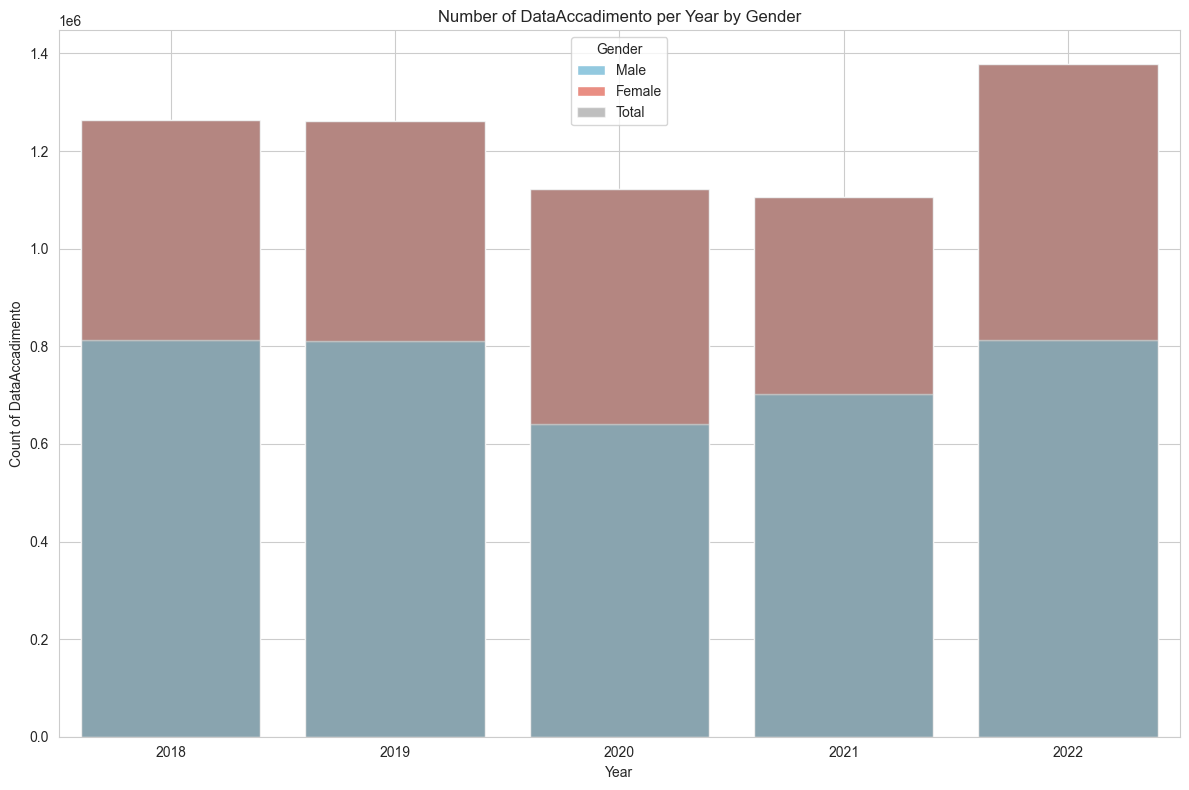

In [433]:

# Pivot the DataFrame for plotting
pivot_df = accidents_per_year_gender.pivot_table(index='Year', columns='Genere', values='Count', aggfunc='sum').reset_index()

# Calculate total counts for each year
pivot_df['Total'] = pivot_df['M'] + pivot_df['F']

# Plotting as a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=pivot_df, x='Year', y='M', label='Male', color='skyblue')
sns.barplot(data=pivot_df, x='Year', y='F', label='Female', color='salmon', bottom=pivot_df['M'])
sns.barplot(data=pivot_df, x='Year', y='Total', label='Total', color='gray', alpha=0.5)

# Adding title and labels
plt.title('Number of DataAccadimento per Year by Gender')
plt.xlabel('Year')
plt.ylabel('Count of DataAccadimento')
plt.legend(title='Gender')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

#### per morti 

In [434]:
import pandas as pd

# Assuming concatenated_df is already defined and contains the relevant data

# Convert DataAccadimento to datetime type if it's not already
deaths['DataAccadimento'] = pd.to_datetime(deaths['DataAccadimento'], errors='coerce')

# Extract year from 'DataAccadimento' column
deaths['Year'] = deaths['DataAccadimento'].dt.year

# Group by 'MacroRegione', 'Year', and 'Genere', and count the number of 'DataAccadimento'
deaths_per_year_gender = deaths.groupby(['MacroRegione', 'Year', 'Genere']).size().reset_index(name='Count')

# Calculate total values summing all MacroRegione for each year and gender
total_values = deaths_per_year_gender.groupby(['Year', 'Genere']).sum().reset_index()
total_values['MacroRegione'] = 'Total'

# Append the total values row to the accidents_per_year_gender DataFrame
deaths_per_year_gender = pd.concat([deaths_per_year_gender, total_values], ignore_index=True)



C:\Users\danie\AppData\Local\Temp\ipykernel_7976\1254856591.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths['DataAccadimento'] = pd.to_datetime(deaths['DataAccadimento'], errors='coerce')
C:\Users\danie\AppData\Local\Temp\ipykernel_7976\1254856591.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths['Year'] = deaths['DataAccadimento'].dt.year


In [435]:
deaths_per_year_gender

,MacroRegione,Year,Genere,Count
0,Centro,2018,F,21
1,Centro,2018,M,220
2,Centro,2019,F,20
3,Centro,2019,M,225
4,Centro,2020,F,30
5,Centro,2020,M,275
6,Centro,2021,F,43
7,Centro,2021,M,229
8,Centro,2022,F,29
9,Centro,2022,M,234


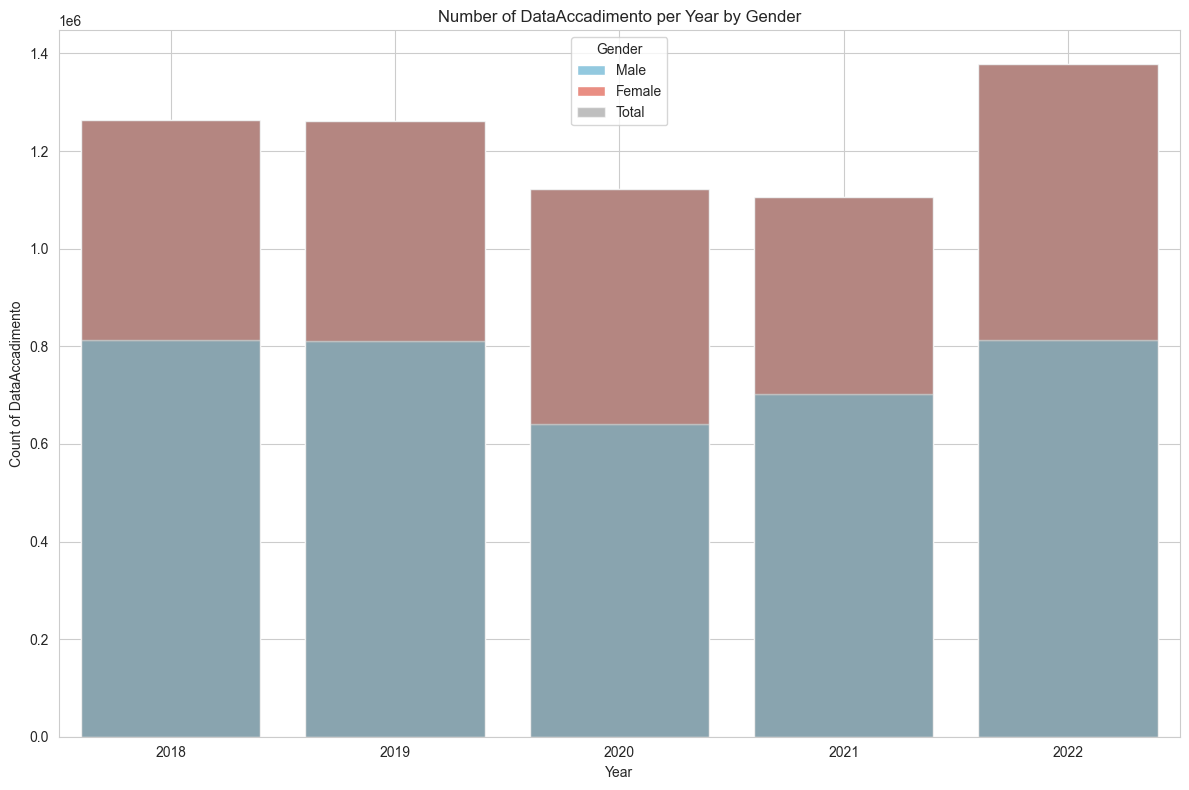

In [436]:

# Pivot the DataFrame for plotting
pivot_df = accidents_per_year_gender.pivot_table(index='Year', columns='Genere', values='Count', aggfunc='sum').reset_index()

# Calculate total counts for each year
pivot_df['Total'] = pivot_df['M'] + pivot_df['F']

# Plotting as a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=pivot_df, x='Year', y='M', label='Male', color='skyblue')
sns.barplot(data=pivot_df, x='Year', y='F', label='Female', color='salmon', bottom=pivot_df['M'])
sns.barplot(data=pivot_df, x='Year', y='Total', label='Total', color='gray', alpha=0.5)

# Adding title and labels
plt.title('Number of DataAccadimento per Year by Gender')
plt.xlabel('Year')
plt.ylabel('Count of DataAccadimento')
plt.legend(title='Gender')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Nazionalità

In [437]:
import pandas as pd

# Assuming concatenated_df is already defined and contains the relevant data

# Convert DataAccadimento to datetime type if it's not already
concatenated_df['DataAccadimento'] = pd.to_datetime(concatenated_df['DataAccadimento'], errors='coerce')

# Extract year from 'DataAccadimento' column
concatenated_df['Year'] = concatenated_df['DataAccadimento'].dt.year

# Group by 'MacroRegione', 'Year', and 'Genere', and count the number of 'DataAccadimento'
accidents_per_year_nationality = concatenated_df.groupby(['MacroRegione', 'Year', 'DescrNazioneNascita']).size().reset_index(name='Count')

# Calculate total values summing all MacroRegione for each year and gender
total_values = accidents_per_year_nationality.groupby(['Year', 'DescrNazioneNascita']).sum().reset_index()
total_values['MacroRegione'] = 'Total'

# Append the total values row to the accidents_per_year_gender DataFrame
accidents_per_year_nationality = pd.concat([accidents_per_year_nationality, total_values], ignore_index=True)

# Add the 'Nazionalità' column to accidents_per_year_nationality DataFrame
accidents_per_year_nationality['Nazionalità'] = accidents_per_year_nationality['DescrNazioneNascita'].apply(lambda x: 1 if x == 'ITALIA' else 0)




In [438]:
accidents_per_year_nationality

,MacroRegione,Year,DescrNazioneNascita,Count,Nazionalità
0,Centro,2018,AFGHANISTAN,48,0
1,Centro,2018,ALBANIA,2441,0
2,Centro,2018,ALGERIA,78,0
3,Centro,2018,ANGOLA,7,0
4,Centro,2018,ANTILLE OLANDESI,1,0
...,...,...,...,...,...
4011,Total,2022,VIETNAM DEL NORD,1,0
4012,Total,2022,VIETNAM DEL SUD,4,0
4013,Total,2022,YEMEN,6,0
4014,Total,2022,ZAMBIA,12,0


In [439]:
# Step 1: Group by Macroregione, Year, and Nazionalità, then sum the 'Count'
grouped_df = accidents_per_year_nationality.groupby(['MacroRegione', 'Year', 'Nazionalità']).agg({'Count': 'sum'}).reset_index()

# Step 2: Create a total row for each year
total_df = grouped_df.groupby(['Year', 'Nazionalità']).agg({'Count': 'sum'}).reset_index()
total_df['MacroRegione'] = 'Total'

# Step 3: Append the total rows to the original grouped DataFrame
final_df = pd.concat([grouped_df, total_df], ignore_index=True)

# Reordering the columns if necessary
data = final_df[['MacroRegione', 'Year', 'Nazionalità', 'Count']]

# Renaming 'Count' to 'FinalCount' for clarity
data.rename(columns={'Count': 'FinalCount'}, inplace=True)


In [440]:
data

,MacroRegione,Year,Nazionalità,FinalCount
0,Centro,2018,0,17488
1,Centro,2018,1,105855
2,Centro,2019,0,18628
3,Centro,2019,1,105942
4,Centro,2020,0,15457
5,Centro,2020,1,87035
6,Centro,2021,0,17140
7,Centro,2021,1,89691
8,Centro,2022,0,21182
9,Centro,2022,1,115993


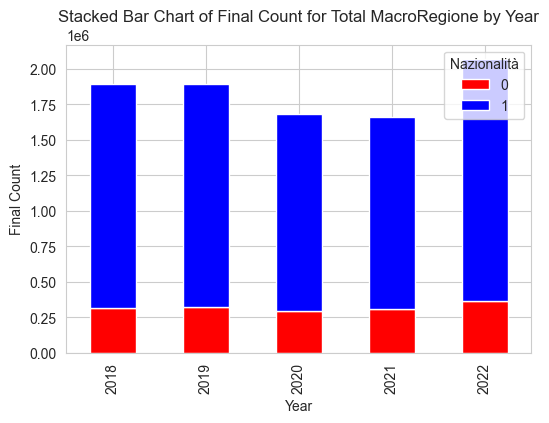

In [441]:
# Filtra i dati per MacroRegione = 'Total'
total_df = data[data['MacroRegione'] == 'Total']

# Crea una tabella pivot per il grafico a barre impilate
pivot_df = total_df.pivot_table(index='Year', columns='Nazionalità', values='FinalCount', aggfunc='sum').fillna(0)

# Plotting
pivot_df.plot(kind='bar', stacked=True, color={0: 'red', 1: 'blue'}, figsize=(6, 4))

plt.xlabel('Year')
plt.ylabel('Final Count')
plt.title('Stacked Bar Chart of Final Count for Total MacroRegione by Year')
plt.legend(title='Nazionalità', labels=['0', '1'])
plt.grid(True)
plt.show()

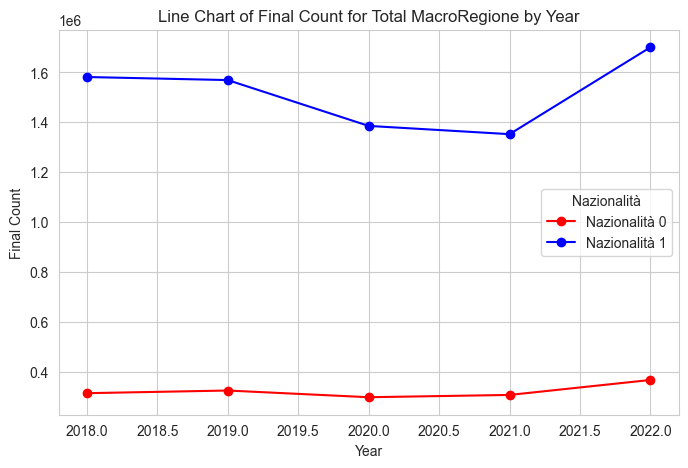

In [442]:
# Pivot the data to get it in the right shape for a line chart
pivot_df = total_df.pivot_table(index='Year', columns='Nazionalità', values='FinalCount', aggfunc='sum').fillna(0)

# Plotting
plt.figure(figsize=(8, 5))
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], marker='o', label=f'Nazionalità {column}', color='red' if column == 0 else 'blue')

plt.xlabel('Year')
plt.ylabel('Final Count')
plt.title('Line Chart of Final Count for Total MacroRegione by Year')
plt.legend(title='Nazionalità')
plt.grid(True)
plt.show()

c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


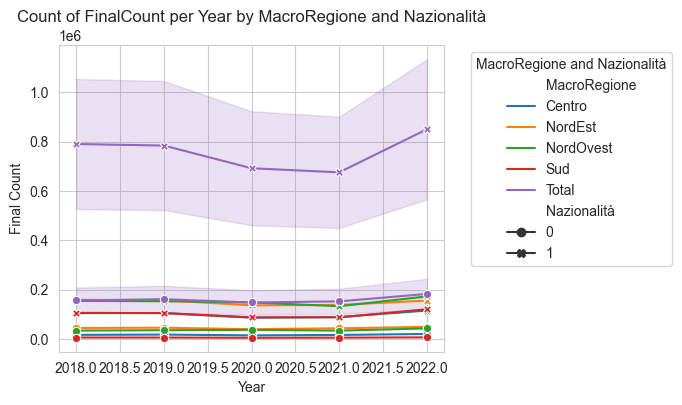

In [443]:
# Plotting
plt.figure(figsize=(7, 4))

# Use seaborn to create a line plot
sns.lineplot(data=data, x='Year', y='FinalCount', hue='MacroRegione', style='Nazionalità', markers=True, dashes=False)

# Adding title and labels
plt.title('Count of FinalCount per Year by MacroRegione and Nazionalità')
plt.xlabel('Year')
plt.ylabel('Final Count')
plt.legend(title='MacroRegione and Nazionalità', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

### per morti

In [444]:
import pandas as pd

# Assuming concatenated_df is already defined and contains the relevant data

# Convert DataAccadimento to datetime type if it's not already
deaths['DataAccadimento'] = pd.to_datetime(deaths['DataAccadimento'], errors='coerce')

# Extract year from 'DataAccadimento' column
deaths['Year'] = deaths['DataAccadimento'].dt.year

# Group by 'MacroRegione', 'Year', and 'Genere', and count the number of 'DataAccadimento'
deaths_per_year_nationality = deaths.groupby(['MacroRegione', 'Year', 'DescrNazioneNascita']).size().reset_index(name='Count')

# Calculate total values summing all MacroRegione for each year and gender
total_values = deaths_per_year_nationality.groupby(['Year', 'DescrNazioneNascita']).sum().reset_index()
total_values['MacroRegione'] = 'Total'

# Append the total values row to the accidents_per_year_gender DataFrame
deaths_per_year_nationality = pd.concat([deaths_per_year_nationality, total_values], ignore_index=True)

# Add the 'Nazionalità' column to accidents_per_year_nationality DataFrame
deaths_per_year_nationality['Nazionalità'] = deaths_per_year_nationality['DescrNazioneNascita'].apply(lambda x: 1 if x == 'ITALIA' else 0)




C:\Users\danie\AppData\Local\Temp\ipykernel_7976\1402921749.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths['DataAccadimento'] = pd.to_datetime(deaths['DataAccadimento'], errors='coerce')
C:\Users\danie\AppData\Local\Temp\ipykernel_7976\1402921749.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths['Year'] = deaths['DataAccadimento'].dt.year


In [445]:
deaths_per_year_nationality

,MacroRegione,Year,DescrNazioneNascita,Count,Nazionalità
0,Centro,2018,ALBANIA,4,0
1,Centro,2018,BANGLADESH,2,0
2,Centro,2018,BOSNIA ED ERZEGOVINA,1,0
3,Centro,2018,BRASILE,1,0
4,Centro,2018,BULGARIA,1,0
...,...,...,...,...,...
751,Total,2022,STATI UNITI D'AMERICA,1,0
752,Total,2022,SVIZZERA,6,0
753,Total,2022,TUNISIA,7,0
754,Total,2022,UCRAINA,8,0


In [446]:
# Step 1: Group by Macroregione, Year, and Nazionalità, then sum the 'Count'
grouped_df = deaths_per_year_nationality.groupby(['MacroRegione', 'Year', 'Nazionalità']).agg({'Count': 'sum'}).reset_index()

# Step 2: Create a total row for each year
total_df = grouped_df.groupby(['Year', 'Nazionalità']).agg({'Count': 'sum'}).reset_index()
total_df['MacroRegione'] = 'Total'

# Step 3: Append the total rows to the original grouped DataFrame
final_df = pd.concat([grouped_df, total_df], ignore_index=True)

# Reordering the columns if necessary
death_data= final_df[['MacroRegione', 'Year', 'Nazionalità', 'Count']]

# Renaming 'Count' to 'FinalCount' for clarity
death_data.rename(columns={'Count': 'FinalCount'}, inplace=True)


In [447]:
death_data

,MacroRegione,Year,Nazionalità,FinalCount
0,Centro,2018,0,34
1,Centro,2018,1,207
2,Centro,2019,0,40
3,Centro,2019,1,205
4,Centro,2020,0,51
5,Centro,2020,1,254
6,Centro,2021,0,49
7,Centro,2021,1,223
8,Centro,2022,0,44
9,Centro,2022,1,219


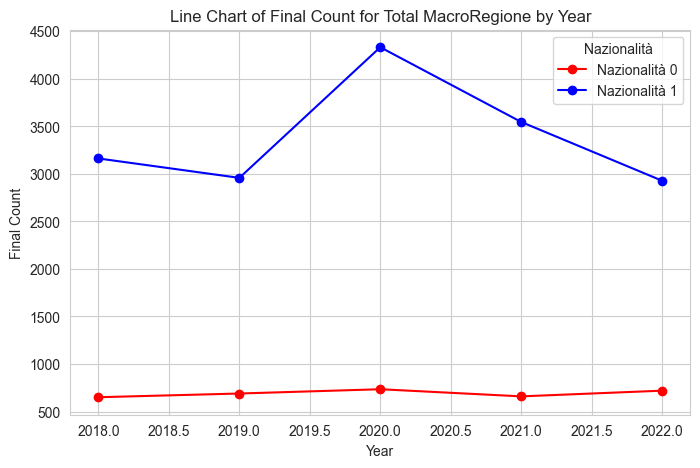

In [448]:
# Filtra i dati per MacroRegione = 'Total'
total_df = death_data[data['MacroRegione'] == 'Total']

# Pivot the data to get it in the right shape for a line chart
pivot_df = total_df.pivot_table(index='Year', columns='Nazionalità', values='FinalCount', aggfunc='sum').fillna(0)

# Plotting
plt.figure(figsize=(8, 5))
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], marker='o', label=f'Nazionalità {column}', color='red' if column == 0 else 'blue')

plt.xlabel('Year')
plt.ylabel('Final Count')
plt.title('Line Chart of Final Count for Total MacroRegione by Year')
plt.legend(title='Nazionalità')
plt.grid(True)
plt.show()

## Attività economica

In [449]:
concatenated_df

,Regione,MacroRegione,DataRilevazione,DataProtocollo,DataAccadimento,DataDefinizione,DataMorte,LuogoAccadimento,DescrProvincia,IdentificativoInfortunato,...,DecisioneIstruttoriaEsitoMortale,DescrDecisioneIstruttoriaEsitoMortale,GradoMenomazione,IdentificativoDatoreLavoro,SettoreAttivitaEconomica,DescrAtecoLiv1,Year,AgeGroup,YearAccadimento,YearMorte
0,Abruzzo,Sud,2023-10-31,2019-09-20,2019-09-18,2020-03-09,NaT,67,Teramo,553058,...,ND,Non Applicabile,-1,3556168,C 22,Attivita' manifatturiere,2019,16-64,2019,NaN
1,Abruzzo,Sud,2023-10-31,2020-07-07,2020-07-03,2020-07-28,NaT,68,Pescara,17888326,...,ND,Non Applicabile,-1,544459,F 43,Costruzioni,2020,16-64,2020,NaN
2,Abruzzo,Sud,2023-10-31,2022-03-02,2022-02-19,2022-03-25,NaT,67,Teramo,3902254,...,ND,Non Applicabile,-1,7446105,G 47,"Commercio all'ingrosso e al dettaglio, riparaz...",2022,16-64,2022,NaN
3,Abruzzo,Sud,2023-10-31,2022-05-24,2022-05-23,2022-06-15,NaT,66,L'Aquila,3749374,...,ND,Non Applicabile,-1,2673133,F 41,Costruzioni,2022,16-64,2022,NaN
4,Abruzzo,Sud,2023-10-31,2021-12-31,2021-12-30,2022-01-20,NaT,69,Chieti,8540763,...,ND,Non Applicabile,-1,4173909,Q 86,Sanita' e assistenza sociale,2021,16-64,2021,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3065938,Veneto,NordEst,2023-10-31,2018-05-18,2018-05-15,2018-06-07,NaT,23,Verona,7548099,...,ND,Non Applicabile,-1,4454317,G 47,"Commercio all'ingrosso e al dettaglio, riparaz...",2018,16-64,2018,NaN
3065939,Veneto,NordEst,2023-10-31,2021-05-10,2021-05-06,2021-05-10,NaT,26,Treviso,33162720,...,ND,Non Applicabile,-1,-1,ND,Non determinato,2021,16-64,2021,NaN
3065940,Veneto,NordEst,2023-10-31,2020-05-05,2020-05-04,2020-05-05,NaT,27,Venezia,32910525,...,ND,Non Applicabile,-1,-1,ND,Non determinato,2020,16-64,2020,NaN
3065941,Veneto,NordEst,2023-10-31,2021-05-10,2021-05-05,2021-06-16,NaT,27,Venezia,33162639,...,ND,Non Applicabile,-1,-1,ND,Non determinato,2021,0-15,2021,NaN


In [450]:
import pandas as pd

# Assuming concatenated_df is already defined and contains the relevant data

# Get all unique values of 'DescrAtecoLiv1'
unique_ateco_values = concatenated_df['DescrAtecoLiv1'].unique()

# Print the unique values
for i in unique_ateco_values:
    print(i, '\n')


Attivita' manifatturiere 

Costruzioni 

Commercio all'ingrosso e al dettaglio, riparazione di autoveicoli e motocicli 

Sanita' e assistenza sociale 

Fornitura di acqua, reti fognarie, attivita' di gestione dei rifiuti e risanamento 

Attivita' immobiliari 

Attivita' dei servizi di alloggio e di ristorazione 

Non determinato 

Attivita' artistiche, sportive, di intrattenimento e divertimento 

Trasporto e magazzinaggio 

Noleggio, agenzie di viaggio, servizi di supporto alle imprese 

Amministrazione pubblica e difesa, assicurazione sociale obbligatoria 

Attivita' finanziarie e assicurative 

Altre attivita' di servizi 

Agricoltura, silvicoltura e pesca 

Attivita' professionali, scientifiche e tecniche 

Estrazione di minerali da cave e miniere 

Fornitura di energia elettrica, gas, vapore e aria condizionata 

Servizi di informazione e comunicazione 

Istruzione 

Attivita' di famiglie e convivenze come datori di lavoro per personale domestico, produzione di beni e servizi indi

In [451]:
import pandas as pd

# Assuming concatenated_df is already defined and contains the relevant data

# Convert DataAccadimento to datetime type if it's not already
concatenated_df['DataAccadimento'] = pd.to_datetime(concatenated_df['DataAccadimento'], errors='coerce')

# Extract year from 'DataAccadimento' column
concatenated_df['Year'] = concatenated_df['DataAccadimento'].dt.year

# Group by 'MacroRegione', 'Year', and 'Genere', and count the number of 'DataAccadimento'
accidents_per_year_job = concatenated_df.groupby(['MacroRegione', 'Year', 'DescrAtecoLiv1']).size().reset_index(name='Count')

# Calculate total values summing all MacroRegione for each year and gender
total_values = accidents_per_year_job.groupby(['Year', 'DescrAtecoLiv1']).sum().reset_index()
total_values['MacroRegione'] = 'Total'

# Append the total values row to the accidents_per_year_gender DataFrame
accidents_per_year_job = pd.concat([accidents_per_year_job, total_values], ignore_index=True)




In [452]:
accidents_per_year_job

,MacroRegione,Year,DescrAtecoLiv1,Count
0,Centro,2018,"Agricoltura, silvicoltura e pesca",319
1,Centro,2018,Altre attivita' di servizi,1490
2,Centro,2018,"Amministrazione pubblica e difesa, assicurazio...",2943
3,Centro,2018,"Attivita' artistiche, sportive, di intrattenim...",1054
4,Centro,2018,Attivita' dei servizi di alloggio e di ristora...,7190
...,...,...,...,...
545,Total,2022,Non determinato,189397
546,Total,2022,Organizzazioni ed organismi extraterritoriali,83
547,Total,2022,Sanita' e assistenza sociale,141889
548,Total,2022,Servizi di informazione e comunicazione,4039


c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


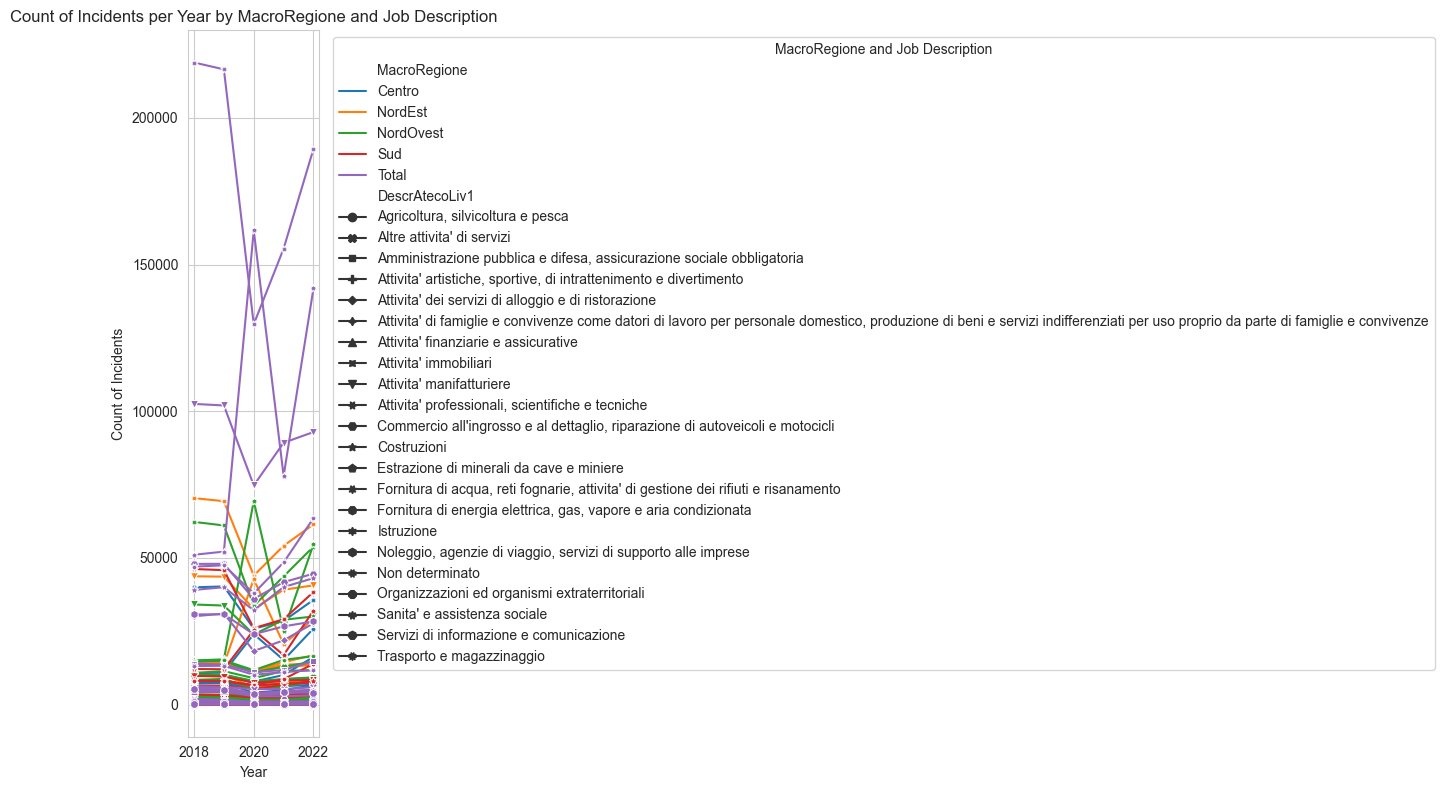

In [453]:
import seaborn as sns

# Plotting the data
plt.figure(figsize=(14, 8))

# Use seaborn to create a line plot
sns.lineplot(data=accidents_per_year_job, x='Year', y='Count', hue='MacroRegione', style='DescrAtecoLiv1', markers=True, dashes=False)

# Adding title and labels
plt.title('Count of Incidents per Year by MacroRegione and Job Description')
plt.xlabel('Year')
plt.ylabel('Count of Incidents')
plt.legend(title='MacroRegione and Job Description', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-p

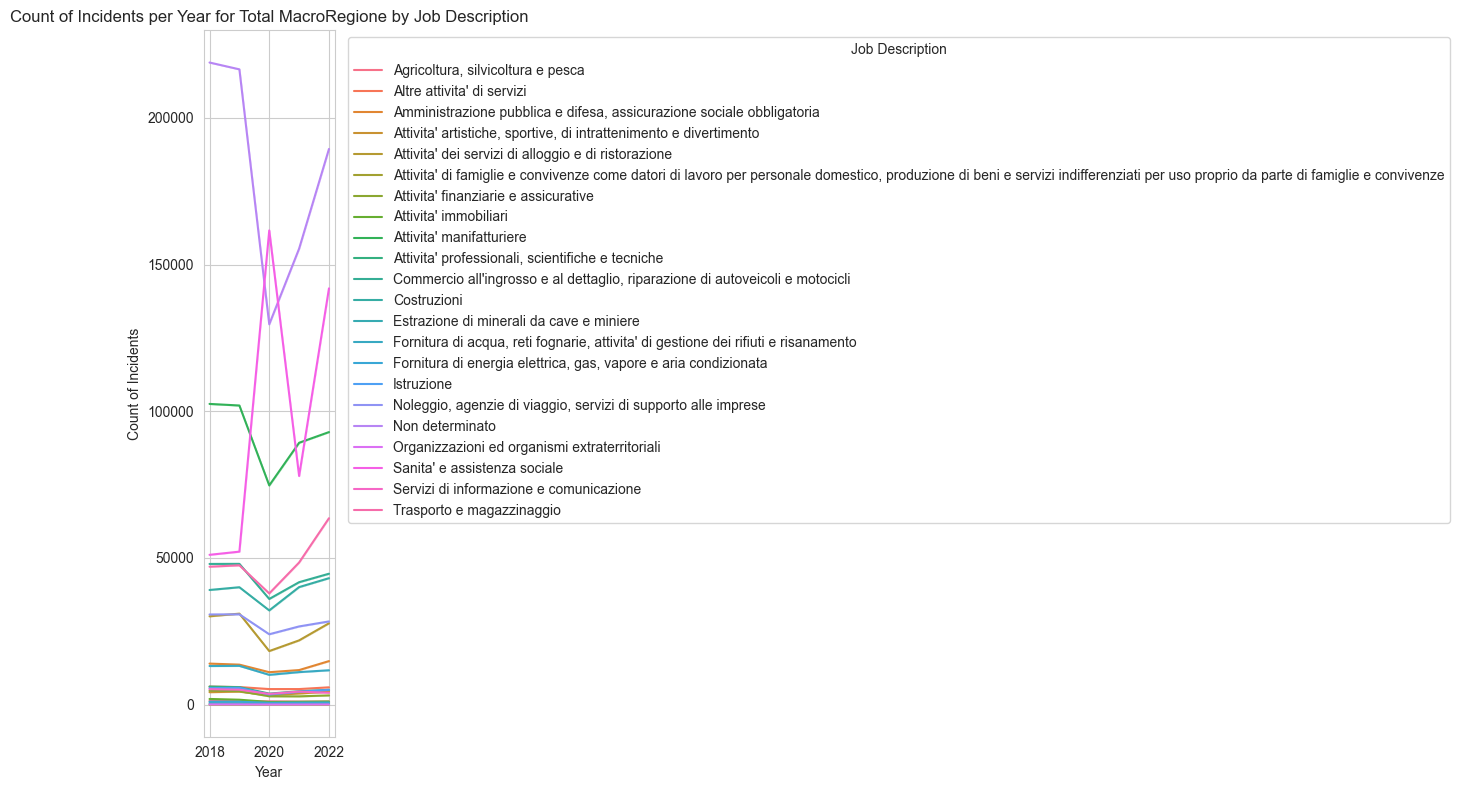

In [454]:
# Append the total values row to the accidents_per_year_job DataFrame
accidents_per_year_job = pd.concat([accidents_per_year_job, total_values], ignore_index=True)

# Filter for rows where MacroRegione is 'Total'
total_only = accidents_per_year_job[accidents_per_year_job['MacroRegione'] == 'Total']

# Plotting the data
plt.figure(figsize=(14, 8))

# Use seaborn to create a line plot
sns.lineplot(data=total_only, x='Year', y='Count', hue='DescrAtecoLiv1', markers=True, dashes=False)

# Adding title and labels
plt.title('Count of Incidents per Year for Total MacroRegione by Job Description')
plt.xlabel('Year')
plt.ylabel('Count of Incidents')
plt.legend(title='Job Description', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

### Per morti

In [455]:
import pandas as pd

# Assuming concatenated_df is already defined and contains the relevant data

# Convert DataAccadimento to datetime type if it's not already
deaths['DataAccadimento'] = pd.to_datetime(deaths['DataAccadimento'], errors='coerce')

# Extract year from 'DataAccadimento' column
deaths['Year'] = deaths['DataAccadimento'].dt.year

# Group by 'MacroRegione', 'Year', and 'Genere', and count the number of 'DataAccadimento'
deaths_per_year_job = deaths.groupby(['MacroRegione', 'Year', 'DescrAtecoLiv1']).size().reset_index(name='Count')

# Calculate total values summing all MacroRegione for each year and gender
total_values = deaths_per_year_job.groupby(['Year', 'DescrAtecoLiv1']).sum().reset_index()
total_values['MacroRegione'] = 'Total'

# Append the total values row to the accidents_per_year_gender DataFrame
deaths_per_year_job = pd.concat([deaths_per_year_job, total_values], ignore_index=True)




C:\Users\danie\AppData\Local\Temp\ipykernel_7976\3378492906.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths['DataAccadimento'] = pd.to_datetime(deaths['DataAccadimento'], errors='coerce')
C:\Users\danie\AppData\Local\Temp\ipykernel_7976\3378492906.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths['Year'] = deaths['DataAccadimento'].dt.year


In [456]:
deaths_per_year_job

,MacroRegione,Year,DescrAtecoLiv1,Count
0,Centro,2018,"Agricoltura, silvicoltura e pesca",3
1,Centro,2018,Altre attivita' di servizi,1
2,Centro,2018,"Amministrazione pubblica e difesa, assicurazio...",3
3,Centro,2018,"Attivita' artistiche, sportive, di intrattenim...",1
4,Centro,2018,Attivita' dei servizi di alloggio e di ristora...,18
...,...,...,...,...
455,Total,2022,"Noleggio, agenzie di viaggio, servizi di suppo...",67
456,Total,2022,Non determinato,270
457,Total,2022,Sanita' e assistenza sociale,44
458,Total,2022,Servizi di informazione e comunicazione,12


c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-p

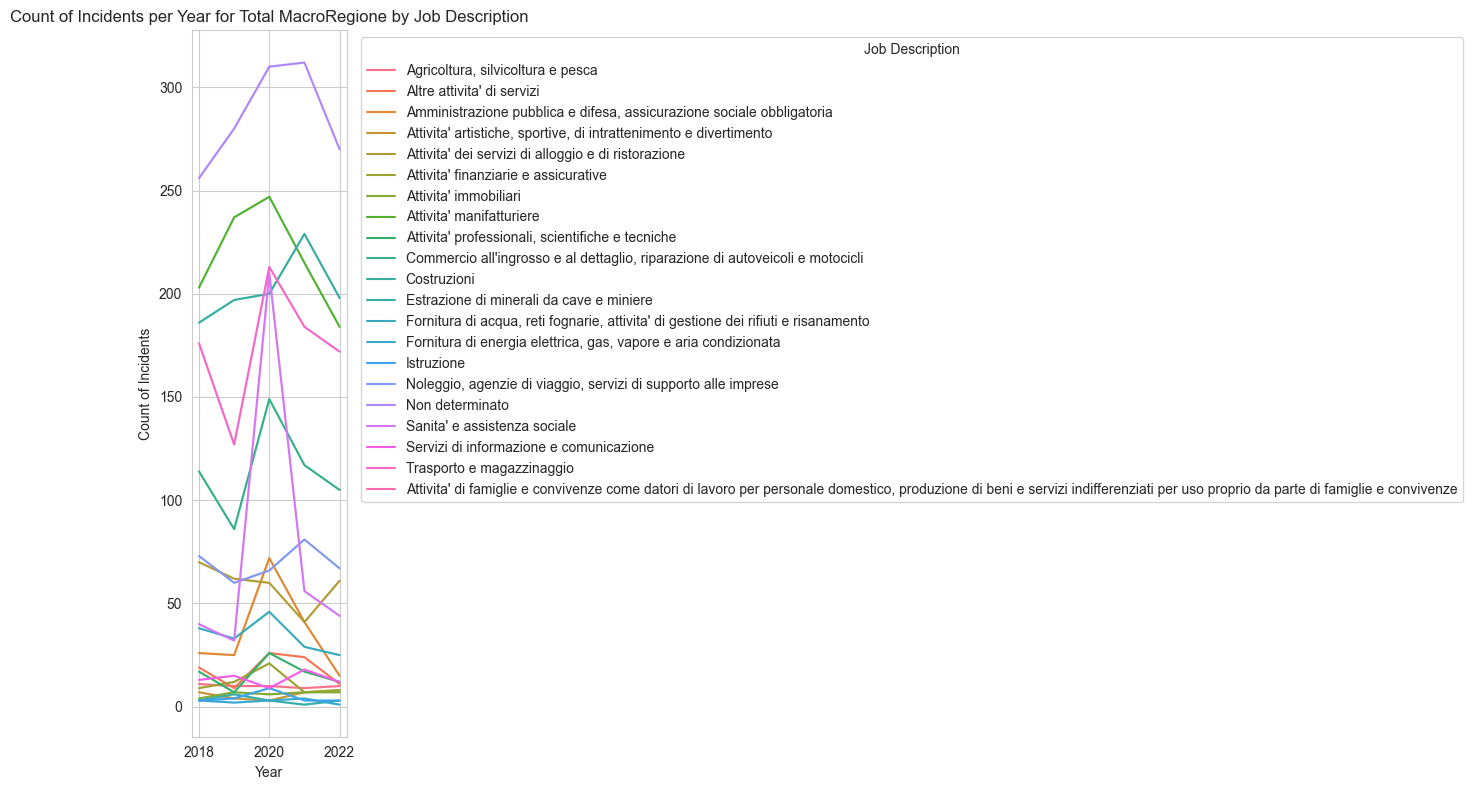

In [457]:
# Append the total values row to the accidents_per_year_job DataFrame
deaths_per_year_job = pd.concat([deaths_per_year_job, total_values], ignore_index=True)

# Filter for rows where MacroRegione is 'Total'
total_only = deaths_per_year_job[deaths_per_year_job['MacroRegione'] == 'Total']

# Plotting the data
plt.figure(figsize=(14, 8))

# Use seaborn to create a line plot
sns.lineplot(data=total_only, x='Year', y='Count', hue='DescrAtecoLiv1', markers=True, dashes=False)

# Adding title and labels
plt.title('Count of Incidents per Year for Total MacroRegione by Job Description')
plt.xlabel('Year')
plt.ylabel('Count of Incidents')
plt.legend(title='Job Description', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

# tipo boh: nella sanità

In [458]:
# Filter concatenated_df for SettoreAttivitaEconomica values 'Q 86', 'Q 87', 'Q 88'
filtered_df = concatenated_df[concatenated_df['SettoreAttivitaEconomica'].isin(['Q 86', 'Q 87', 'Q 88'])]

# Group by MacroRegione, Year and sum the occurrences
sector_counts = filtered_df.groupby(['MacroRegione', concatenated_df['DataAccadimento'].dt.year])['SettoreAttivitaEconomica'].count().reset_index(name='Count')


In [459]:
sector_counts

,MacroRegione,DataAccadimento,Count
0,Centro,2018,10631
1,Centro,2019,10982
2,Centro,2020,24052
3,Centro,2021,15198
4,Centro,2022,25927
5,NordEst,2018,13261
6,NordEst,2019,13680
7,NordEst,2020,42774
8,NordEst,2021,20618
9,NordEst,2022,29277


c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-p

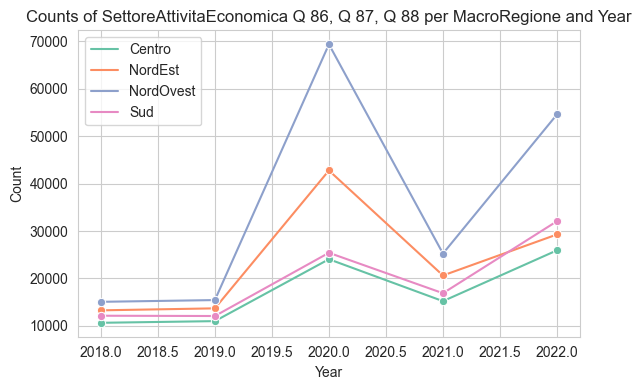

In [460]:
# Set up the plot
plt.figure(figsize=(6, 4))
sns.set_style('whitegrid')

# Plot MorteAccadimentoRatio per MacroRegione based on Year
sns.lineplot(x='DataAccadimento', y='Count', hue='MacroRegione', data=sector_counts, marker='o', palette='Set2')

# Set plot title and labels
plt.title('Counts of SettoreAttivitaEconomica Q 86, Q 87, Q 88 per MacroRegione and Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Display the plot
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [461]:
deaths

,Regione,MacroRegione,DataRilevazione,DataProtocollo,DataAccadimento,DataDefinizione,DataMorte,LuogoAccadimento,DescrProvincia,IdentificativoInfortunato,...,DescrNazioneNascita,IdentificativoCaso,DecisioneIstruttoriaEsitoMortale,DescrDecisioneIstruttoriaEsitoMortale,GradoMenomazione,IdentificativoDatoreLavoro,SettoreAttivitaEconomica,DescrAtecoLiv1,Year,AgeGroup
339,Abruzzo,Sud,2023-10-31,2021-06-21,2021-06-18,2021-11-19,2021-06-18,66,L'Aquila,5960865,...,ITALIA,23638609,015,Esiti Mortali Nei Termini Con Superstiti,-1,8245033,F 42,Costruzioni,2021,16-64
391,Abruzzo,Sud,2023-10-31,2021-07-13,2021-07-12,2023-01-18,2021-07-12,69,Chieti,9409360,...,ITALIA,23687107,017,Morte Con Superstiti Itinere,-1,4173909,Q 86,Sanita' e assistenza sociale,2021,16-64
974,Abruzzo,Sud,2023-10-31,2022-06-07,2022-03-17,2022-10-31,2022-10-02,68,Pescara,17949838,...,ITALIA,24387687,024,Persona non tutelata,-1,-1,ND,Non determinato,2022,65+
1636,Abruzzo,Sud,2023-10-31,2018-10-15,2018-08-22,2022-02-28,2018-08-22,66,L'Aquila,4299208,...,ITALIA,21840591,015,Esiti Mortali Nei Termini Con Superstiti,-1,7157326,C 23,Attivita' manifatturiere,2018,16-64
1776,Abruzzo,Sud,2023-10-31,2020-11-13,2020-11-11,2020-12-04,2020-11-11,69,Chieti,19463380,...,ITALIA,23243188,015,Esiti Mortali Nei Termini Con Superstiti,-1,7000574,G 47,"Commercio all'ingrosso e al dettaglio, riparaz...",2020,16-64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063492,Veneto,NordEst,2023-10-31,2020-04-10,2020-03-29,2020-04-15,2020-03-29,25,Belluno,32898079,...,ITALIA,22904406,021,Difetto Occasione di lavoro,-1,4658153,L 68,Attivita' immobiliari,2020,16-64
3063531,Veneto,NordEst,2023-10-31,2020-05-08,2020-03-10,2020-06-09,2020-04-03,27,Venezia,32900612,...,ITALIA,22969798,015,Esiti Mortali Nei Termini Con Superstiti,-1,5826271,H 53,Trasporto e magazzinaggio,2020,16-64
3064536,Veneto,NordEst,2023-10-31,2020-05-04,2020-03-23,2020-09-10,2020-04-21,27,Venezia,32910144,...,ITALIA,22969663,021,Difetto Occasione di lavoro,-1,3344959,O 84,"Amministrazione pubblica e difesa, assicurazio...",2020,16-64
3065214,Veneto,NordEst,2023-10-31,2020-01-08,2019-12-23,2023-02-28,2019-12-23,23,Verona,27964027,...,ITALIA,22770058,015,Esiti Mortali Nei Termini Con Superstiti,-1,-1,ND,Non determinato,2019,16-64


C:\Users\danie\AppData\Local\Temp\ipykernel_7976\2489000371.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths['DataAccadimento'] = pd.to_datetime(deaths['DataAccadimento'])
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_i

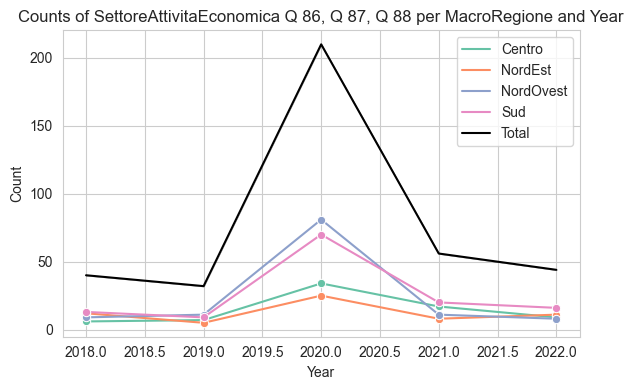

In [462]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming deaths DataFrame is already defined and contains the relevant data

# Convert DataAccadimento to datetime type if it's not already
deaths['DataAccadimento'] = pd.to_datetime(deaths['DataAccadimento'])

# Filter deaths DataFrame for SettoreAttivitaEconomica values 'Q 86', 'Q 87', 'Q 88'
filtered_df = deaths[deaths['SettoreAttivitaEconomica'].isin(['Q 86', 'Q 87', 'Q 88'])]

# Group by MacroRegione, Year and sum the occurrences
sector_counts = filtered_df.groupby(['MacroRegione', deaths['DataAccadimento'].dt.year])['SettoreAttivitaEconomica'].count().reset_index(name='Count')

# Calculate total sum for each year
total_sum = sector_counts.groupby('DataAccadimento')['Count'].sum().reset_index(name='Total')
sector_counts = pd.merge(sector_counts, total_sum, on='DataAccadimento')

# Set up the plot
plt.figure(figsize=(6, 4))
sns.set_style('whitegrid')

# Plot counts of SettoreAttivitaEconomica Q 86, Q 87, Q 88 per MacroRegione and Year
sns.lineplot(x='DataAccadimento', y='Count', hue='MacroRegione', data=sector_counts, marker='o', palette='Set2')

# Plot total line
sns.lineplot(x='DataAccadimento', y='Total', data=sector_counts, color='black', label='Total')

# Set plot title and labels
plt.title('Counts of SettoreAttivitaEconomica Q 86, Q 87, Q 88 per MacroRegione and Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Display the plot
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [463]:
sector_counts

,MacroRegione,DataAccadimento,Count,Total
0,Centro,2018,6,40
1,Centro,2019,7,32
2,Centro,2020,34,210
3,Centro,2021,17,56
4,Centro,2022,9,44
5,NordEst,2018,12,40
6,NordEst,2019,5,32
7,NordEst,2020,25,210
8,NordEst,2021,8,56
9,NordEst,2022,11,44


c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-p

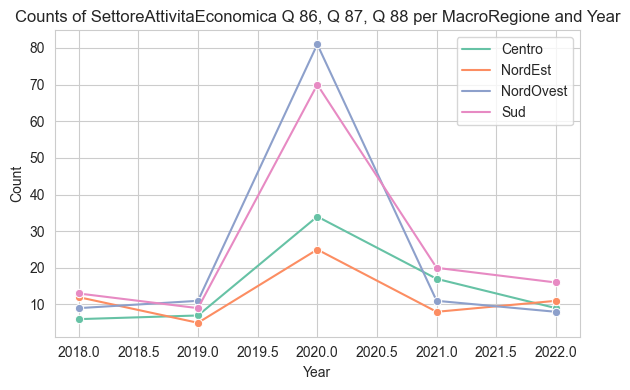

In [464]:
# Set up the plot
plt.figure(figsize=(6, 4))
sns.set_style('whitegrid')

# Plot counts of SettoreAttivitaEconomica Q 86, Q 87, Q 88 per MacroRegione and Year
sns.lineplot(x='DataAccadimento', y='Count', hue='MacroRegione', data=sector_counts, marker='o', palette='Set2')

# Set plot title and labels
plt.title('Counts of SettoreAttivitaEconomica Q 86, Q 87, Q 88 per MacroRegione and Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Display the plot
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 2. Dati ISTAT

In [465]:
# Specifica il percorso del file CSV
file_path = 'dati-istat/occupazione-italia-2016-2024.csv'

# Carica il file CSV in un DataFrame
occupazione_df = pd.read_csv(file_path)

In [514]:
occupazione_df['Classe di età'].unique()

array(['15 anni e più', '15-64 anni', '15-74 anni', '0-14 anni',
       '15-89 anni'], dtype=object)

In [515]:

# Replace values in 'Classe di età' column
occupazione_df['Classe di età'] = occupazione_df['Classe di età'].replace({
    '15-64 anni': '15-64',
    '0-14 anni': '0-14',
    '15 anni e più': '15+'
})

# Filter rows with desired categories and drop the rest
desired_categories = ['15-64', '0-14', '15+']
occupazione_df = occupazione_df[occupazione_df['Classe di età'].isin(desired_categories)]


In [516]:
occupazione_df

,ITTER107,Territorio,TIPO_DATO_FOL,Tipo dato,SEXISTAT1,Sesso,ETA1,Classe di età,CONDIZIONE_PROF_EU,Condizione professionale europea,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,IT,Italia,POP,popolazione 0 anni e più (in migliaia),1,maschi,Y_GE15,15+,EMP,occupati,2016,2016,13024.280,NaN,NaN
1,IT,Italia,POP,popolazione 0 anni e più (in migliaia),1,maschi,Y_GE15,15+,EMP,occupati,2016-Q2,T2-2016,13117.656,NaN,NaN
2,IT,Italia,POP,popolazione 0 anni e più (in migliaia),1,maschi,Y_GE15,15+,EMP,occupati,2016-Q1,T1-2016,12812.322,NaN,NaN
3,IT,Italia,POP,popolazione 0 anni e più (in migliaia),1,maschi,Y_GE15,15+,EMP,occupati,2016-Q4,T4-2016,13049.710,NaN,NaN
4,IT,Italia,POP,popolazione 0 anni e più (in migliaia),1,maschi,Y_GE15,15+,EMP,occupati,2016-Q3,T3-2016,13117.431,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65191,ITG2,Sardegna,POP,popolazione 0 anni e più (in migliaia),2,femmine,Y15-64,15-64,UNEM,disoccupati,2023-Q1,T1-2023,30.755,NaN,NaN
65192,ITG2,Sardegna,POP,popolazione 0 anni e più (in migliaia),2,femmine,Y15-64,15-64,UNEM,disoccupati,2023-Q2,T2-2023,30.817,NaN,NaN
65193,ITG2,Sardegna,POP,popolazione 0 anni e più (in migliaia),2,femmine,Y15-64,15-64,UNEM,disoccupati,2023-Q3,T3-2023,22.642,NaN,NaN
65194,ITG2,Sardegna,POP,popolazione 0 anni e più (in migliaia),2,femmine,Y15-64,15-64,UNEM,disoccupati,2023-Q4,T4-2023,23.597,NaN,NaN


In [517]:
# Filter the DataFrame
filtered_df = occupazione_df[occupazione_df['Territorio'].isin(['Nord-est', 'Nord-ovest', 'Centro', 'Mezzogiorno', 'Italia'])]


# Replace the values
filtered_df['Territorio'] = filtered_df['Territorio'].replace({
    'Nord-est': 'NordEst',
    'Nord-ovest': 'NordOvest',
    'Mezzogiorno': 'Sud',
    'Italia': 'Total'
})


# Step 3: Keep only rows where the 'TIME' column has values with 4 characters
filtered_df = filtered_df[filtered_df['TIME'].str.len() == 4]

# Step 4: Remove specified columns
columns_to_remove = ['ITTER107', 'TIPO_DATO_FOL', 'SEXISTAT1', 'ETA1', 'CONDIZIONE_PROF_EU', 'Flag Codes', 'Flags']
cleaned_df = filtered_df.drop(columns=columns_to_remove)

# Step 5: Remove dot in 'Value' column
cleaned_df['Value'] = cleaned_df['Value'].astype(str).str.replace('.', '')

# Step 6: Apply padding with '0' for 'Value' column when 'Territorio' is 'Total'
cleaned_df.loc[cleaned_df['Territorio'] == 'Total', 'Value'] = cleaned_df.loc[cleaned_df['Territorio'] == 'Total', 'Value'].apply(lambda x: x.ljust(8, '0'))



C:\Users\danie\AppData\Local\Temp\ipykernel_7976\473029131.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Territorio'] = filtered_df['Territorio'].replace({


In [518]:
cleaned_df['Sesso'].unique()

array(['maschi', 'totale', 'femmine'], dtype=object)

In [519]:
cleaned_df


,Territorio,Tipo dato,Sesso,Classe di età,Condizione professionale europea,TIME,Seleziona periodo,Value
0,Total,popolazione 0 anni e più (in migliaia),maschi,15+,occupati,2016,2016,13024280
5,Total,popolazione 0 anni e più (in migliaia),maschi,15+,occupati,2017,2017,13157897
10,Total,popolazione 0 anni e più (in migliaia),maschi,15+,occupati,2018,2018,13282229
15,Total,popolazione 0 anni e più (in migliaia),maschi,15+,occupati,2019,2019,13335637
20,Total,popolazione 0 anni e più (in migliaia),maschi,15+,occupati,2020,2020,12987414
...,...,...,...,...,...,...,...,...
64757,Centro,popolazione 0 anni e più (in migliaia),totale,15-64,forze lavoro,2019,2019,5215698
64762,Centro,popolazione 0 anni e più (in migliaia),totale,15-64,forze lavoro,2020,2020,5031733
64767,Centro,popolazione 0 anni e più (in migliaia),totale,15-64,forze lavoro,2021,2021,5062888
64768,Centro,popolazione 0 anni e più (in migliaia),totale,15-64,forze lavoro,2022,2022,5131835


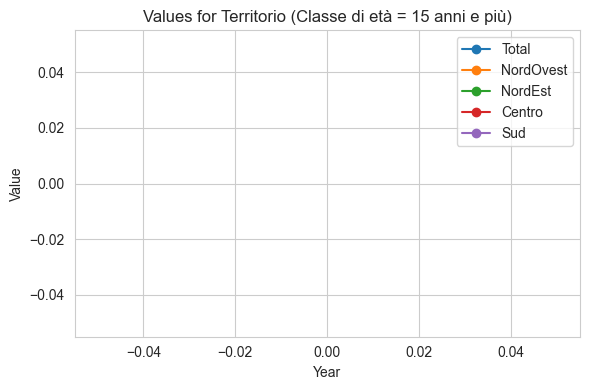

In [520]:
# Convert 'Value' to numeric type
cleaned_df['Value'] = pd.to_numeric(cleaned_df['Value'])

# Get unique values in 'Territorio' column
territori = cleaned_df['MacroRegione'].unique()

# Plotting for each Territorio
plt.figure(figsize=(6, 4))

for territorio in territori:
    # Filter the DataFrame for the current Territorio
    filtered_df = cleaned_df[(cleaned_df['MacroRegione'] == territorio) & 
                             (cleaned_df['Classe di età'] == '15 anni e più') & 
                             (cleaned_df['Condizione professionale europea'] == 'occupati') & 
                             (cleaned_df['Sesso'] == 'maschi')]
    
    # Plot the data for the current Territorio
    plt.plot(filtered_df['TIME'], filtered_df['Value'], marker='o', linestyle='-', label=territorio)

plt.title('Values for Territorio (Classe di età = 15 anni e più)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [508]:
# Define the function
def sum_classe_di_eta(df):
    # Filter the DataFrame to include only relevant 'Classe di età' values
    df_filtered = df[df['Classe di età'].isin(['0-14 anni', '15 anni e più'])]

    df_filtered = df_filtered[df_filtered['Condizione professionale europea'].isin(['occupati'])]
    
    return df_filtered
    # # Group by the relevant columns except 'Classe di età' and 'Value', and sum 'Value'
    # grouped_df = df_filtered.groupby(['Territorio', 'Tipo dato', 'Sesso', 'Condizione professionale europea', 'Seleziona periodo']).agg({'Value': 'sum'}).reset_index()
    
    # return grouped_df
#     # Add the new 'Classe di età' column with the value 'Total'
#     grouped_df['Classe di età'] = 'Total'
    
#     # Add the 'TIME' column with the value 'Total'
#     grouped_df['TIME'] = 'Total'
    
#     # Reorder the columns to match the original DataFrame's column order
#     grouped_df = grouped_df[['Territorio', 'Tipo dato', 'Sesso', 'Classe di età', 'Condizione professionale europea', 'TIME', 'Seleziona periodo', 'Value']]
    
#     return grouped_df

new_df = sum_classe_di_eta(cleaned_df)

In [509]:
# Drop the 'Tipo dato' column
new_df = new_df.drop(columns=['Tipo dato'])


# Replace values in 'Classe di età' column with '15+'
new_df.loc[:, 'Classe di età'] = '15+'

new_df

,Territorio,Sesso,Classe di età,Condizione professionale europea,TIME,Seleziona periodo,Value
0,Total,maschi,15+,occupati,2016,2016,13024280
5,Total,maschi,15+,occupati,2017,2017,13157897
10,Total,maschi,15+,occupati,2018,2018,13282229
15,Total,maschi,15+,occupati,2019,2019,13335637
20,Total,maschi,15+,occupati,2020,2020,12987414
...,...,...,...,...,...,...,...
58993,Centro,totale,15+,occupati,2019,2019,4908361
58998,Centro,totale,15+,occupati,2020,2020,4763434
59003,Centro,totale,15+,occupati,2021,2021,478284
59004,Centro,totale,15+,occupati,2022,2022,4930154


In [510]:
# Rename columns 'Territorio' to 'MacroRegione' and 'Classe di età' to 'AgeGroup'
new_df = new_df.rename(columns={'Territorio': 'MacroRegione', 'Classe di età': 'AgeGroup'})


# Filter rows where 'Sesso' column value is 'totale'
filtered_df = new_df[new_df['Sesso'] == 'totale']


In [511]:
filtered_df

,MacroRegione,Sesso,AgeGroup,Condizione professionale europea,TIME,Seleziona periodo,Value
41,Total,totale,15+,occupati,2016,2016,22449112
46,Total,totale,15+,occupati,2017,2017,22734648
51,Total,totale,15+,occupati,2018,2018,22958730
56,Total,totale,15+,occupati,2019,2019,23109405
61,Total,totale,15+,occupati,2020,2020,22385257
66,Total,totale,15+,occupati,2021,2021,22553955
67,Total,totale,15+,occupati,2022,2022,23099389
68,Total,totale,15+,occupati,2023,2023,23579947
6732,NordEst,totale,15+,occupati,2016,2016,498069
6737,NordEst,totale,15+,occupati,2017,2017,5053964


In [495]:
injury_per_year_region_age


,MacroRegione,Year,AgeGroup,Count
0,Centro,2018,0-15,9823
1,Centro,2018,16-64,110517
2,Centro,2018,65+,3003
3,Centro,2019,0-15,10455
4,Centro,2019,16-64,110922
...,...,...,...,...
70,Total,2021,16-64,506466
71,Total,2021,65+,11837
72,Total,2022,0-15,49397
73,Total,2022,16-64,625183


In [499]:
# Create an empty dataframe to store results
result_df = pd.DataFrame(columns=['Year', 'MacroRegione', 'AgeGroup', 'Count'])

# Iterate through each year and Macroregione combination in the original dataframe
for (year, macroregione) in injury_per_year_region_age[['Year', 'MacroRegione']].drop_duplicates().itertuples(index=False):
    # Calculate the sum of '16-64' and '65+' for the current year and Macroregione
    sum_15plus = injury_per_year_region_age[(injury_per_year_region_age['Year'] == year) & 
                                            (injury_per_year_region_age['MacroRegione'] == macroregione) & 
                                            ((injury_per_year_region_age['AgeGroup'] == '16-64') |
                                             (injury_per_year_region_age['AgeGroup'] == '65+'))]['Count'].sum()
    
    # Append a new row for '15+' for the current year and Macroregione
    df_to_append = pd.DataFrame({'Year': [year], 'MacroRegione': [macroregione], 'AgeGroup': ['15+'], 'Count': [sum_15plus]})
    result_df = pd.concat([result_df, df_to_append], ignore_index=True)

In [500]:
result_df


,Year,MacroRegione,AgeGroup,Count
0,2018,Centro,15+,113520
1,2019,Centro,15+,114115
2,2020,Centro,15+,98844
3,2021,Centro,15+,100941
4,2022,Centro,15+,129013
5,2018,NordEst,15+,186421
6,2019,NordEst,15+,185399
7,2020,NordEst,15+,171432
8,2021,NordEst,15+,172140
9,2022,NordEst,15+,192044
